# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note** If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


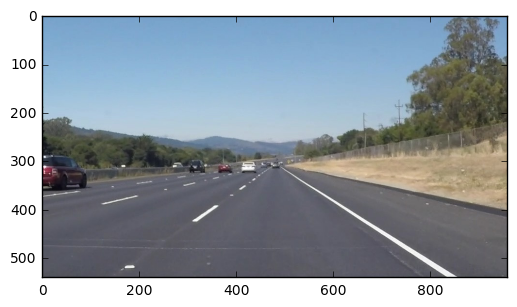

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

Below are some helper functions to help get you started. They should look familiar from the lesson!

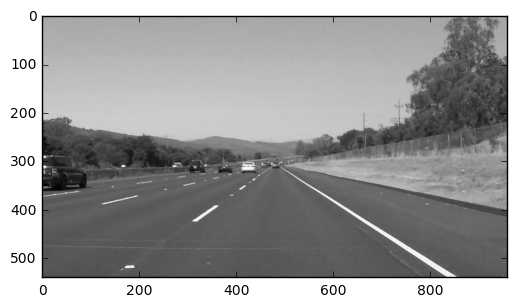

In [3]:
import math
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = grayscale(image)
plt.imshow(gray, cmap='gray')

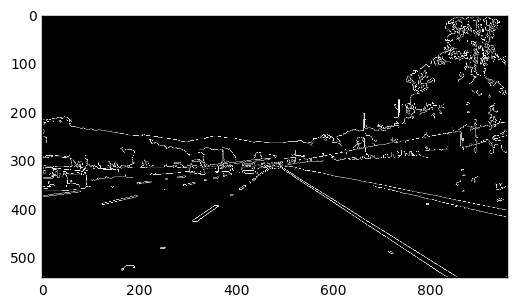

In [4]:
def gaussian(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def canny(image, low_threshold, high_threshold):
    return cv2.Canny(image, low_threshold, high_threshold)

kernel_size = 1
low_threshold = 50
high_threshold = 150
smooth_g = gaussian(gray, kernel_size)
canny_img = canny(smooth_g, low_threshold, high_threshold)
plt.imshow(canny_img, cmap='Greys_r')

(540, 960)


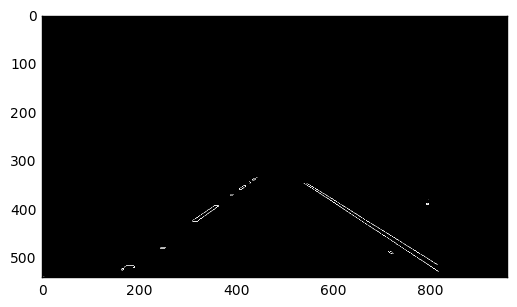

In [5]:
def region_of_interest(image, vertices):
    mask = np.zeros_like(image)
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(image.shape) > 2:
        channel_count = image.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

vertices = np.array([[(0,540),(410,330),(800,380),(850,850)]], dtype=np.int32)

mask_image = region_of_interest(canny_img, vertices)

plt.imshow(mask_image, cmap='Greys_r')

print (mask_image.shape)

418.6 321.6 463.182805697 147.2779654 -0.696412248047
441.916666667 689.25 498.907263671 842.382878099 0.640511264144


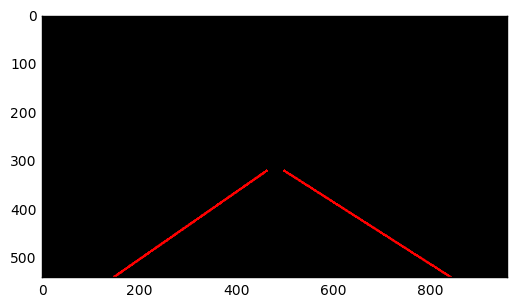

In [88]:
def draw_lines(image, lines, color=[255, 0, 0], thickness=4):

    left_slope = []
    leftx = []
    lefty = []
    rightx = []
    righty = []
    right_slope = []

    y_min = 320
    y_max = 540


    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = float((y2-y1)/(x2-x1))

            if -0.8 < slope < -0.4:
                left_slope.append(slope)
                leftx.append(x1)
                leftx.append(x2)
                lefty.append(y1)
                lefty.append(y2)


            elif 0.8 > slope > 0.4:
                right_slope.append(slope)
                rightx.append(x1)
                rightx.append(x2)
                righty.append(y1)
                righty.append(y2)



    left_slope_array = np.array(left_slope)
    left_slope_avg = np.nanmean(left_slope_array)
    
    left_x = np.array(leftx)
    left_x_avg = np.nanmean(left_x)
    
    left_y = np.array(lefty)
    left_y_avg = np.nanmean(left_y)
    
    left_intercept = left_y_avg - (left_x_avg * left_slope_avg)
    left_x1 = (y_min - left_intercept) / left_slope_avg
    left_x2 = (y_max - left_intercept) / left_slope_avg
    
    if left_x1 == float('nan') or left_x2 == float('nan'):
        left_x1, left_x2 = 0
    else:
        left_x1 == left_x1
        left_x2 == left_x2
        
        
    
    print (left_y_avg, left_x_avg, left_x1, left_x2, left_slope_avg)
    
    cv2.line(image, (int(left_x1), y_min), (int(left_x2), y_max), color=[255,0,0], thickness=4)



    right_slope_array = np.array(right_slope)
    right_slope_avg = np.nanmean(right_slope_array)
    right_x = np.array(rightx)
    right_x_avg = np.nanmean(right_x)
    right_y = np.array(righty)
    right_y_avg = np.nanmean(right_y)
    right_intercept = right_y_avg - (right_x_avg * right_slope_avg)
    right_x1 = (y_min - right_intercept) / right_slope_avg
    right_x2 = (y_max - right_intercept) / right_slope_avg
    
    print (right_y_avg, right_x_avg, right_x1, right_x2, right_slope_avg)
    
    if right_x2 == float('nan') or right_x1 == float('nan'):
        right_x1, right_x2 = 0
    else:
        right_x2 == right_x2
        right_x1 == right_x1
        
        
    cv2.line(image, (int(right_x2), y_max), (int(right_x1), y_min), color=[255,0,0], thickness=4)


def hough_lines(image, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*image.shape, 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

rho = 1
theta = np.pi/180
threshold = 15
min_line_len = 5
max_line_gap = 250
new_image = np.copy(image)*0
 
hough_image = hough_lines(mask_image, rho, theta, threshold, min_line_len, max_line_gap)


def weighted_image(hough_image, line_image, alpha=0.8, beta=1.0, lamba=0.):
    return cv2.addWeighted(line_image, alpha, hough_image, beta, lamba)

last = weighted_image(hough_image, new_image)

plt.imshow(last, cmap='Greys_r')

418.6 321.6 463.182805697 147.2779654 -0.696412248047
441.916666667 689.25 498.907263671 842.382878099 0.640511264144


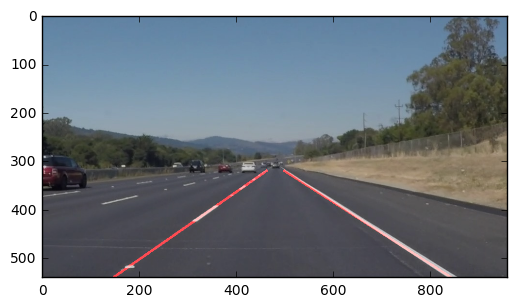

In [89]:
def process_image(image):
    gray = grayscale(image)
    kernel_size = 1
    low_threshold = 50
    high_threshold = 150
    smooth_g = gaussian(gray, kernel_size)
    canny_img = canny(smooth_g, low_threshold, high_threshold)
    
    vertices = np.array([[(0,540),(410,330),(800,380),(850,850)]], dtype=np.int32)

    mask_image = region_of_interest(canny_img, vertices)
    
    rho = 1
    theta = np.pi/180
    threshold = 15
    min_line_len = 5
    max_line_gap = 250
    
    hough_image = hough_lines(mask_image, rho, theta, threshold, min_line_len, max_line_gap)
    
    color_edges = np.dstack((canny_img, canny_img, canny_img))
    
    last = weighted_image(hough_image, image)
    result = last

    return result

image = mpimg.imread('test_images/solidwhiteright.jpg')
processed_image = process_image(image)
#cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#cv2.imwrite("test_images/" + "solidwhitecurve_processed.jpg", processed_image)


plt.imshow(processed_image)

## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [56]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

run your solution on all test_images and make copies into the test_images directory).

In [1]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images directory.



## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

In [90]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Let's try the one with the solid white lane on the right first ...

In [91]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

429.3 308.3 455.463679637 159.2513327 -0.742710431469
426.5 675.625 503.112765999 859.476066283 0.617347520985
[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4






  0%|          | 0/222 [00:00<?, ?it/s]



  3%|▎         | 7/222 [00:00<00:03, 62.95it/s]

429.3 308.3 455.463679637 159.2513327 -0.742710431469
426.5 675.625 503.112765999 859.476066283 0.617347520985
443.375 286.3125 455.081570218 154.135710458 -0.731028498533
413.5 656.611111111 508.704850521 856.719581322 0.632157148905
435.5 298.6875 456.092573759 156.273385647 -0.733775584497
436.166666667 689.916666667 502.605273068 857.341341289 0.62017939451
446.357142857 282.714285714 454.074897126 155.719508122 -0.737375653693
415.833333333 658.416666667 506.183964704 855.657297905 0.629518704574
445.583333333 286.333333333 457.296430946 157.799033668 -0.734563979518
441.428571429 700.357142857 503.198912412 860.403235807 0.615894001251
390.2 359.8 456.54735838 153.350508757 -0.725601206852
450.1875 713.8125 502.352659148 859.692380607 0.615660635493
399.833333333 347.25 455.751713379 156.749079432 -0.735779471559
415.3 659.3 504.041554778 862.455594116 0.613815241184
411.75 328.916666667 457.770400934 148.802318767 -0.712047660252
429.0 681.1 503.911342712 861.539825312 0.6151635





  6%|▋         | 14/222 [00:00<00:03, 64.59it/s]

453.214285714 709.642857143 502.542488586 844.563472584 0.643235386988
428.928571429 308.571428571 461.519539632 152.614502211 -0.712192982792
416.25 650.833333333 500.516227971 844.098183085 0.640313022048






 10%|▉         | 22/222 [00:00<00:03, 66.11it/s]

418.083333333 318.916666667 458.043874967 145.982847004 -0.7049903073
419.625 658.875 502.16565453 848.223933108 0.635731070801
421.5625 310.75 455.0730876 142.447076307 -0.703716236183
449.25 706.125 504.51495851 847.680986578 0.641089099752
436.785714286 288.428571429 459.11792759 137.574675616 -0.68420033277
428.125 676.5 509.556269637 849.233686329 0.647673319417
394.166666667 351.25 457.560631079 142.21224226 -0.69764110996
413.166666667 650.75 508.880982965 843.884744121 0.656709044822
397.375 347.875 458.251956584 144.417637379 -0.701006826013
447.55 691.8 500.300649402 830.601371719 0.666059699951
402.8 343.4 460.723099987 148.995056543 -0.705743370307
437.25 681.833333333 497.170897855 843.659049712 0.634942345997
416.5 325.875 463.420420128 149.845369058 -0.701586428031
446.6875 684.4375 496.192542721 823.090544508 0.672992795297
388.9 364.5 463.326917189 147.769271594 -0.697178480925
439.0 677.416666667 486.893791308 839.120955837 0.624596914024
406.583333333 341.583333333 4

447.571428571 281.5 465.361069111 148.288228763 -0.693846876819
432.916666667 676.25 500.468865301 842.950190471 0.642370791724
449.8125 277.8125 455.533283189 154.340622223 -0.730429484219
441.714285714 692.214285714 501.883565143 845.908576504 0.639488388155






 13%|█▎        | 29/222 [00:00<00:03, 63.27it/s]



 16%|█▌        | 36/222 [00:00<00:02, 65.00it/s]

438.857142857 294.857142857 461.596969036 152.967963849 -0.712829955393
451.0 705.083333333 499.342848012 844.861220307 0.636724462837
390.2 360.8 459.618766144 149.930325236 -0.71039138353
439.75 691.125 503.131135142 848.506085194 0.636988872433
407.4 335.1 457.95438636 148.709935568 -0.71141131049
441.916666667 694.916666667 503.556758066 848.867871331 0.637106630945
409.857142857 332.642857143 458.296802958 150.6543919 -0.715115966111
429.2 676.8 504.824651309 851.29513402 0.634974726501
417.3 321.6 459.411854585 147.812594475 -0.706035052594
439.375 691.75 504.460376235 849.622405373 0.637381813259
382.9 371.0 456.898831043 156.457768571 -0.732256763404
438.6 688.1 502.53731826 846.75139906 0.639137130848
402.4 346.1 458.647639605 158.156368814 -0.732134412494
430.6 676.4 502.140686878 848.768615331 0.63468630754
406.416666667 341.5 463.148845066 153.454581831 -0.710378028002
446.5 699.416666667 501.328329742 845.829785263 0.638603978226
422.714285714 318.785714286 457.152818977 1





 19%|█▉        | 42/222 [00:00<00:02, 61.58it/s]

402.0 338.166666667 455.171840911 141.255519768 -0.700823707409
431.0 674.9 505.395963085 841.349910123 0.654851660294
385.9 363.6 456.155133838 147.16986154 -0.712008046092
424.25 667.0 506.614766535 845.077609338 0.649997495082
413.875 324.625 452.667008989 152.59519032 -0.733157818605
418.833333333 657.583333333 505.440614583 844.105688361 0.649609354592
383.125 367.0 453.141158435 152.926428046 -0.732808812262
434.25 681.833333333 506.052808939 844.536094425 0.64995823851
398.75 344.666666667 450.497576295 154.842971619 -0.744111529198
422.583333333 664.75 507.016637767 845.291273262 0.650359136971






 22%|██▏       | 48/222 [00:00<00:04, 41.60it/s]

409.214285714 331.5 456.104003645 148.833922599 -0.715982497387
431.3125 680.6875 509.761478818 847.582699796 0.651232031437
426.25 305.333333333 452.433371048 147.849763544 -0.722297571439
436.428571429 685.285714286 505.064952109 845.604797204 0.646033065349
438.214285714 292.357142857 457.638379994 150.04550363 -0.715231128239
439.7 693.9 509.543768761 848.377276468 0.649286434181
433.5625 297.3125 455.141703943 149.385623658 -0.719527800706
420.666666667 660.416666667 505.735630635 843.780278916 0.650801605996






 24%|██▍       | 53/222 [00:01<00:04, 35.59it/s]

429.0 300.1875 452.498750206 145.081547956 -0.715639848355
426.5 670.642857143 506.118924802 845.980569075 0.647322237467
415.0 320.3 452.921856451 145.797557302 -0.71632235095
430.1875 678.5625 510.328991362 846.223461246 0.654967615502


420.7 309.6 455.877229025 136.304335425 -0.688418837784
420.6875 662.125 506.023989705 847.101305806 0.645015043847
384.5 361.3 453.6760019 138.595065187 -0.698233292991
407.357142857 640.285714286 504.281998499 846.79340048 0.642314383486
408.9 328.6 455.680798182 141.19513339 -0.699554938843
436.0 682.916666667 503.972459268 843.349404335 0.648246745095






 26%|██▌       | 57/222 [00:01<00:05, 32.16it/s]

430.1 297.7 457.569613861 138.120794157 -0.688686219608
432.25 674.166666667 503.119176426 838.357019214 0.656250494187
378.9 373.3 457.106911864 144.076001677 -0.702805994042
437.166666667 680.416666667 502.752044638 836.347067509 0.659482261176
390.0 357.7 458.976738188 140.678418168 -0.691175498464
429.8 671.2 500.655425717 842.365865993 0.643819954176






 27%|██▋       | 61/222 [00:01<00:05, 30.48it/s]

405.25 332.9375 458.304376722 134.776952923 -0.680004178367
434.285714286 677.357142857 503.438229975 838.232137273 0.657120679929
426.857142857 305.0 459.851165615 141.03994229 -0.690063535738
432.642857143 673.571428571 503.261537899 835.889605921 0.661399386132
434.375 292.6875 459.008252255 139.09073972 -0.687677264858
422.333333333 658.333333333 502.015137044 838.073800077 0.65464760829


446.25 274.6875 454.910823271 140.858299551 -0.700519764636
436.142857143 678.071428571 501.561135792 835.910275866 0.6579948133
424.571428571 305.214285714 461.091766705 133.152803965 -0.67085654648
442.5 687.9 498.348786506 838.767292373 0.646263338238






 29%|██▉       | 65/222 [00:01<00:05, 27.33it/s]

430.357142857 296.5 459.442337703 134.61230526 -0.677277277429
428.714285714 666.428571429 495.557821353 841.340942399 0.636236954928
377.1 374.0 458.347106967 133.367010071 -0.676964534448
432.333333333 672.888888889 498.618456802 839.919599761 0.644592040016
398.5 338.75 458.829930648 122.300188705 -0.653731223664
418.7 652.2 499.377332105 840.015497626 0.645846596971






 31%|███       | 68/222 [00:01<00:05, 26.60it/s]

398.5 340.625 453.017687858 138.031811058 -0.698444013536
414.083333333 646.25 499.434102017 842.741427682 0.640825241855
427.25 297.166666667 457.237184207 128.887404637 -0.67001720022
418.142857143 652.214285714 497.83616572 843.894833538 0.635730355744
384.916666667 359.916666667 457.291279458 127.292591693 -0.666669317658
436.642857143 680.285714286 502.927018761 837.443113198 0.657666413241






 32%|███▏      | 71/222 [00:01<00:05, 25.72it/s]

398.5 339.2 453.946746262 132.36350833 -0.684115258664
426.0 662.642857143 502.313157697 835.072911264 0.661137645529
394.25 344.5 455.827966319 125.967325373 -0.66694831905
417.285714286 649.214285714 502.809915245 833.885877833 0.664500069049
413.0 317.642857143 456.137021772 128.516417273 -0.671508436828
442.0 687.916666667 501.880420792 837.355618271 0.655786185249






 33%|███▎      | 74/222 [00:01<00:05, 26.11it/s]

430.928571429 291.857142857 457.913164751 128.581196024 -0.668018962297
420.75 653.5625 497.569271044 838.199646928 0.645861366382
448.571428571 266.0 462.419139949 126.324167147 -0.654576883926
420.833333333 654.75 500.410553924 837.151163544 0.653321855799
445.1875 268.1875 452.68789394 128.453552119 -0.678521586469
420.666666667 653.583333333 500.466870741 835.092252565 0.657451621872






 35%|███▍      | 77/222 [00:02<00:05, 26.18it/s]

428.285714286 291.857142857 452.402235532 126.228828251 -0.674487849373
434.214285714 671.785714286 500.646898703 830.295148857 0.667378030665
385.0 356.3 452.553457053 126.772525489 -0.675300420266
446.428571429 688.285714286 497.467417593 829.512815228 0.662560004044
380.25 365.5 457.208376222 122.339616572 -0.656973795435
422.3 649.7 495.811610041 826.754384147 0.664767498231






 36%|███▋      | 81/222 [00:02<00:05, 27.71it/s]

407.583333333 323.833333333 456.148639712 123.786690292 -0.661928961435
437.75 674.0 499.2544721 825.742931871 0.673836986932
416.916666667 308.416666667 455.827127846 121.206648471 -0.657461254048
469.642857143 704.571428571 491.691058669 804.660767165 0.702943428798
372.5 374.75 457.675729265 110.177435203 -0.633096633163
423.833333333 655.0 498.285876795 830.328641853 0.662565257104
391.75 346.0 453.505910425 123.871063129 -0.667405166064
421.3 652.4 499.318782194 831.775523727 0.661740228173






 38%|███▊      | 85/222 [00:02<00:04, 28.74it/s]

397.5 337.666666667 453.31832617 125.016841128 -0.670115762565
439.25 678.0 499.958643571 828.420684782 0.669788201977
417.857142857 308.142857143 455.567676546 124.130856282 -0.663776582893
440.2 678.4 499.554742246 826.892152445 0.672089388946
442.944444444 268.888888889 461.190207156 117.081205648 -0.639332301789
425.666666667 654.833333333 498.611538082 823.868272675 0.676388761867






 40%|████      | 89/222 [00:02<00:04, 28.46it/s]

440.5 275.4 456.808109926 125.60658143 -0.664248142209
439.857142857 677.142857143 502.790439233 822.817523359 0.687441816373
429.928571429 290.357142857 457.781347326 122.715363074 -0.656587091318
417.071428571 643.571428571 497.739084016 828.249474914 0.66563716621
436.5 281.833333333 457.983298766 125.339587219 -0.661368281929
419.9375 647.0625 501.661272972 821.744024154 0.687322260221






 41%|████▏     | 92/222 [00:02<00:04, 28.54it/s]

406.0 327.166666667 458.987196659 121.771887376 -0.652402171382
425.1 654.5 496.878842611 826.818467973 0.666788657951
388.125 357.5 460.815252144 127.173336964 -0.659389573045
439.375 674.875 501.01025051 821.431150093 0.686596911394
390.25 352.583333333 457.78548695 128.326785233 -0.667761995218
421.3125 647.125 500.42681477 818.981788249 0.690618631998






 43%|████▎     | 96/222 [00:02<00:04, 29.04it/s]

425.583333333 301.666666667 458.314313951 131.913533501 -0.67401799621
433.5 664.875 500.612372614 819.006892658 0.690966666039
381.0 367.785714286 462.12325603 121.889498918 -0.646614262698
432.6875 664.375 502.033822916 818.972782059 0.69413997129
390.875 352.125 460.340420413 124.433648055 -0.654943627531
414.5 639.8125 502.611581376 822.021127379 0.688770898533
409.166666667 323.833333333 458.650576192 126.017378859 -0.661389187141
421.15 652.45 502.448762526 828.699600334 0.674327770247


416.428571429 310.714285714 458.39550836 121.463533732 -0.652950792939
443.666666667 685.388888889 507.506231142 823.955164061 0.695214858116
435.916666667 283.25 457.466826262 126.818069014 -0.665358617499
425.9375 660.75 511.389640014 821.565726828 0.709274535828
424.0 300.75 458.15424382 125.183728046 -0.660719161541
435.5 674.333333333 509.380969589 823.57594815 0.700202151568






 45%|████▌     | 100/222 [00:02<00:04, 29.74it/s]

437.1875 277.9375 456.659643753 121.138605881 -0.655696588791
441.642857143 684.071428571 512.565597581 822.746431081 0.709263681824
426.571428571 297.285714286 458.539757545 125.65607575 -0.660891512655
443.357142857 684.571428571 509.045825658 822.085117478 0.7027871764
380.625 368.75 457.287171518 135.997641887 -0.684740645774
430.666666667 666.416666667 508.83696401 822.097818689 0.702290109709






 46%|████▋     | 103/222 [00:02<00:04, 27.71it/s]

393.75 349.625 465.821012323 119.202399291 -0.634703364817
435.333333333 671.75 505.831623821 822.323324047 0.695120914208
415.4 319.4 466.348261639 127.473863729 -0.64920808818
435.166666667 671.5 504.501939743 823.514153259 0.689628768678
407.357142857 331.428571429 457.410658229 140.137700465 -0.693409238375
440.071428571 681.071428571 508.343182773 824.82325241 0.695146459782






 48%|████▊     | 106/222 [00:03<00:04, 28.13it/s]

383.5 366.7 456.480903329 145.428954786 -0.707277356823
414.3125 644.5625 507.849488221 826.755917288 0.68985752543
392.8 353.0 458.56672525 139.546401693 -0.689611237137
434.0625 675.625 509.337339989 830.067511626 0.685934843228
406.916666667 332.666666667 464.347089013 131.042856036 -0.660057623737
440.0 685.166666667 511.852664778 829.595001574 0.692384912313
412.714285714 325.0 456.960138063 143.834386727 -0.702593124523
435.5 675.75 509.029118451 826.592702354 0.692774647823






 50%|████▉     | 110/222 [00:03<00:03, 29.68it/s]

435.5 291.357142857 459.25792515 139.446911259 -0.687906264775
429.166666667 668.916666667 509.815582675 830.446774842 0.686146592641
432.25 298.333333333 459.962029458 143.184184047 -0.694493012018
428.428571429 666.642857143 508.805401409 829.055311593 0.686963502577
437.571428571 289.285714286 460.177597978 140.404206865 -0.687987200044
444.666666667 693.25 510.891639294 832.700511128 0.68363559633






 51%|█████▏    | 114/222 [00:03<00:03, 31.21it/s]

445.8125 276.9375 459.910710449 139.957555566 -0.687600658542
421.833333333 659.916666667 510.599640472 833.183068585 0.681994116332
377.0 375.8 461.631022572 130.353391591 -0.664095548343
434.583333333 679.833333333 510.482201903 835.636374249 0.676602112815
380.75 369.75 461.124054284 130.222129305 -0.664849562341
404.928571429 636.428571429 511.682389946 834.826409262 0.680810990917


408.357142857 328.785714286 461.776524843 130.643382954 -0.664385324722
428.125 671.0 509.749074885 837.843442749 0.67053878868
422.5 308.6 458.407351527 136.869621421 -0.684212082755
424.642857143 665.428571429 510.890991095 835.789112206 0.677135340913
423.333333333 306.75 463.91997424 129.300029083 -0.657462303679
417.875 656.4375 510.631365711 838.369292083 0.671268053824






 53%|█████▎    | 118/222 [00:03<00:03, 28.30it/s]

390.583333333 354.666666667 454.083514132 144.212820734 -0.709973562158
448.4 700.1 507.050095969 837.820959574 0.665112995752
408.142857143 330.428571429 458.14559132 139.370533568 -0.690141824619
442.214285714 691.5 506.51454549 839.509986689 0.66066970529
412.333333333 325.083333333 458.930665584 140.016444337 -0.689840669819
438.142857143 684.5 503.788597054 840.300762153 0.653765369628
448.416666667 273.5 461.703789531 139.278089102 -0.682327741576
434.083333333 681.416666667 504.028966454 846.106050867 0.64312989681






 55%|█████▍    | 122/222 [00:03<00:03, 28.81it/s]



 57%|█████▋    | 126/222 [00:03<00:03, 30.17it/s]

449.0 272.25 460.388240436 139.532326514 -0.685666027815
434.166666667 680.0 504.390346971 842.79143018 0.650116122307
431.4 299.3 460.965238069 141.698161093 -0.689078254118
425.666666667 668.333333333 505.397888259 844.632568855 0.648518599613
457.75 260.583333333 462.68865983 139.907013157 -0.681575307232
417.416666667 657.583333333 508.032002979 845.769823455 0.651392845758
396.333333333 351.083333333 463.638069409 139.24450692 -0.678188550696
428.916666667 673.333333333 507.010221685 842.965091426 0.654849861736


401.5 347.0 462.140725362 151.331405367 -0.707829482088
433.416666667 683.25 505.755141295 850.050826071 0.638985644398
398.4 349.2 458.822693227 151.207992846 -0.715180385488
442.8 696.5 504.91614656 848.144548488 0.64097259657
407.875 337.25 463.066883658 148.07724605 -0.698435674489
432.333333333 681.25 505.189162466 849.996737458 0.638037026899






 59%|█████▊    | 130/222 [00:03<00:03, 28.31it/s]

405.25 341.25 463.522944964 147.979861185 -0.697210654612
438.5 692.1 504.886566254 852.455810339 0.632967397846
398.416666667 352.25 463.045222225 152.206341594 -0.707762167827
434.857142857 685.857142857 504.604481953 851.77997672 0.633685278241






 60%|█████▉    | 133/222 [00:03<00:03, 28.24it/s]

407.5 340.083333333 463.613033971 153.024072368 -0.708331676905
432.25 680.916666667 505.771138462 849.040770578 0.640895609214
429.214285714 310.142857143 463.475837834 154.603646514 -0.712268718849
423.0 665.428571429 504.082476243 848.705203824 0.63837925474
432.642857143 303.785714286 462.150672531 152.8519589 -0.711286501703
437.571428571 689.142857143 504.574076314 849.939717233 0.637006042102
432.714285714 301.714285714 458.080754807 152.878774576 -0.720834117241
428.428571429 675.714285714 507.577898176 848.724191732 0.644884626202
430.285714286 303.0 458.438159927 148.36721914 -0.709515053043
412.3 653.5 509.775149251 852.347924601 0.642199310134






 62%|██████▏   | 137/222 [00:04<00:02, 29.15it/s]

438.8125 291.875 457.392527171 150.910835618 -0.717824281395
426.357142857 678.428571429 511.698779626 856.57974588 0.637901251523
402.0 344.75 461.933851624 147.538152144 -0.699755118673
439.75 698.5 510.652702911 855.758384411 0.637485882711






 63%|██████▎   | 140/222 [00:04<00:02, 29.36it/s]

397.3 352.2 461.925060503 149.641576536 -0.704488105506
427.375 676.9375 508.327408361 853.791624059 0.636824278763
406.0 342.75 463.164763833 155.126995888 -0.714198137025
433.3 685.9 507.034512105 854.346139086 0.633436899054
419.2 324.6 463.962586803 154.892333812 -0.711812275271
436.083333333 687.166666667 504.816451643 850.404798852 0.636595538526
393.3 361.6 461.835128909 160.992995757 -0.731280548023
433.8 681.8 504.191209672 847.54739484 0.640734052578






 64%|██████▍   | 143/222 [00:04<00:02, 27.22it/s]

394.25 361.75 466.041797906 157.02906337 -0.711944769301
421.916666667 663.416666667 504.94142931 847.030249115 0.643107834173
406.25 344.916666667 465.884803206 157.32839696 -0.712997674157
423.0 667.071428571 506.123912238 849.895306348 0.639960170535






 66%|██████▌   | 146/222 [00:04<00:02, 26.69it/s]

402.3 351.5 464.21573058 162.910010925 -0.730155405783
445.5 701.2 505.731421132 848.38550361 0.642046925019
409.142857143 341.285714286 463.441880106 161.966727281 -0.729745048435
442.5 702.3 509.397618334 855.834548673 0.635036223721
443.1875 294.25 465.937332113 159.321700942 -0.717510712547
432.071428571 687.0 510.40699226 857.065031673 0.634631178244
433.875 305.375 461.587556585 159.793813896 -0.72897468993
422.785714286 675.357142857 510.099690236 863.812653456 0.621973246322






 68%|██████▊   | 150/222 [00:04<00:02, 27.90it/s]

438.916666667 299.0 465.64807291 157.343298921 -0.713579608753
438.142857143 699.928571429 510.793438073 862.991872617 0.624647864447
422.083333333 322.25 461.297350558 161.6361216 -0.734162376509
413.4 659.35 504.936296865 868.651657569 0.604868597174
398.357142857 355.5 467.254445625 153.486266478 -0.701154593171
415.7 661.8 507.987158442 861.579897656 0.622184721577






 69%|██████▉   | 153/222 [00:04<00:02, 28.33it/s]

399.8 354.5 466.779662312 157.236733632 -0.710725329564
436.4 696.1 512.928736901 859.128718703 0.635470859515
426.0 319.214285714 461.469971501 166.222321755 -0.745137176163
442.1 705.3 512.386796312 859.978154308 0.63292712819
436.3125 303.25 459.044460478 164.366061293 -0.746576608968
432.0 690.3 512.727040071 861.531068503 0.630726660439






 70%|███████   | 156/222 [00:04<00:02, 26.26it/s]

398.375 355.875 464.632136115 159.34894702 -0.720642367015
433.916666667 692.833333333 514.083669223 859.291506276 0.637297234844
411.3 337.7 463.033381988 161.025232619 -0.72845716402
437.4 701.1 515.869389568 862.979562439 0.633804530072






 72%|███████▏  | 159/222 [00:04<00:02, 25.23it/s]

410.6 336.5 464.523141774 153.650170579 -0.707684554094
433.916666667 694.75 512.471978019 864.493907814 0.62496106458
448.375 287.6875 460.713836515 164.193532458 -0.741939074628
414.5 662.916666667 513.175809567 861.778863132 0.631090283776
428.571428571 313.642857143 466.904784995 156.347720663 -0.708404429546
423.666666667 678.583333333 510.479014379 867.227729845 0.616680566634


435.166666667 308.333333333 464.588062228 166.098565642 -0.737044360074
414.666666667 667.75 514.795896196 870.252616304 0.618922044666
417.666666667 331.833333333 466.78138047 162.802844258 -0.723735309545
417.9 670.8 510.749796117 870.41317563 0.611683069591
405.416666667 351.5 463.597906777 174.877444444 -0.761982708889
414.285714286 667.714285714 506.173074572 883.102567237 0.583663534644
419.7 331.4 466.453161108 168.442173709 -0.738227814753
408.0 656.642857143 510.737715968 875.500568905 0.603131591468






 73%|███████▎  | 163/222 [00:05<00:02, 27.48it/s]

407.1 349.8 466.415584196 171.86416602 -0.746898457874
433.1 697.1 506.811455988 876.957164941 0.594360530674
419.0 336.2 466.573300771 176.854854614 -0.75935793153
436.0 702.4 505.55327269 878.883272761 0.589290975701
434.125 314.25 469.860768038 169.888203146 -0.733400403064
425.0 684.166666667 505.783908647 879.538258784 0.588621911476






 75%|███████▌  | 167/222 [00:05<00:01, 28.91it/s]

406.4375 352.875 466.028352451 178.031388874 -0.763896942758
431.916666667 693.5 502.154658172 878.291443299 0.584893604398
398.5 360.0 464.2578125 172.0703125 -0.752941176471
423.6 681.0 504.028138599 879.837110686 0.58540379911
420.9 334.8 466.550511969 179.284777249 -0.765841426282
410.5 655.5 502.721792757 874.116329701 0.592361971207






 77%|███████▋  | 170/222 [00:05<00:02, 25.66it/s]

442.5 306.928571429 467.682649178 178.981448322 -0.762033546615
442.75 712.375 506.122937156 875.780402131 0.595145562705
430.833333333 317.166666667 465.898018032 170.671876976 -0.745191463106
427.125 684.875 503.289405795 876.207312213 0.589942172832






 78%|███████▊  | 173/222 [00:05<00:01, 26.42it/s]

447.428571429 301.714285714 469.168507788 180.065927077 -0.76097556604
422.9 677.0 503.52703158 874.411900893 0.593175991265
432.833333333 317.583333333 466.129885935 176.497021187 -0.759582308421
427.25 686.0 504.278776889 877.040260194 0.590189732182
409.875 347.25 467.814910441 172.690790307 -0.74544906699
418.5 670.4 503.355915108 876.449302684 0.589664698774
400.75 356.25 463.664351077 171.018441022 -0.751761744966
417.642857143 669.285714286 503.727126148 876.748670745 0.589778266661






 79%|███████▉  | 176/222 [00:05<00:01, 27.32it/s]

402.75 356.0 462.088500021 180.040524134 -0.780009143156
412.071428571 660.214285714 504.360854835 876.764708293 0.590756507908
422.4 334.2 465.37543253 183.553214204 -0.780633980199
407.666666667 651.75 502.445390926 877.126158944 0.58716651288






 81%|████████  | 179/222 [00:05<00:01, 27.81it/s]

437.375 313.625 466.577867393 179.89304672 -0.767393263039
410.0 656.25 503.878067769 876.342791001 0.590659963959
401.833333333 356.333333333 464.870434956 173.080263587 -0.753966451191
409.666666667 656.944444444 499.699291117 885.505243519 0.570234851562
397.75 361.75 461.357704897 179.509536699 -0.780562106918
406.8125 655.4375 506.575199889 883.821633576 0.5831731737
426.666666667 324.666666667 462.222082784 178.514037042 -0.775445051003






 82%|████████▏ | 182/222 [00:05<00:01, 25.91it/s]

414.285714286 662.642857143 506.746759179 870.504321094 0.604798423548
426.5 325.5 461.935135135 180.097297297 -0.7805907173
425.9 677.8 503.156073616 865.966874414 0.606376655589
435.166666667 313.333333333 460.821288106 179.078740639 -0.780854727046
443.166666667 704.944444444 503.168915234 863.57987404 0.61041429131






 84%|████████▍ | 186/222 [00:05<00:01, 27.55it/s]

432.875 317.875 468.734269294 174.70069902 -0.748213885218
455.666666667 723.722222222 498.906757095 863.47237622 0.603457891965
443.833333333 300.666666667 459.15955686 177.584031887 -0.781317907588
410.0 662.428571429 512.338718817 879.2250252 0.599640804719
437.625 309.375 461.291292167 177.154550176 -0.774275084801
410.714285714 661.857142857 510.654943094 877.350041733 0.599953478561
378.5 385.75 463.972361594 169.802796625 -0.747867985673
419.5 674.714285714 506.623047954 878.282066117 0.591940432624






 86%|████████▌ | 190/222 [00:06<00:01, 28.83it/s]

402.666666667 353.5 459.69490742 177.079427995 -0.778442852626
417.416666667 676.166666667 510.267548881 884.924239175 0.58720424778
415.5 334.75 456.981496939 175.401085142 -0.781304347826
413.375 675.125 514.94447799 892.344369205 0.582936045083
421.75 322.75 455.41605229 168.570533825 -0.766963350785
434.416666667 713.666666667 518.871753092 893.422788662 0.587369888499






 87%|████████▋ | 193/222 [00:06<00:01, 26.53it/s]

410.333333333 340.166666667 458.846399955 169.81088715 -0.761152143089
410.285714286 671.857142857 518.090976307 892.774356825 0.587162418829
385.5 374.75 462.802447922 167.053767879 -0.743874833079
427.214285714 700.428571429 514.720381002 895.787154162 0.577326640619
387.833333333 375.166666667 465.130927864 173.354945603 -0.75400311669
420.714285714 683.357142857 511.068335453 887.415517584 0.584566619456


401.5 358.0 466.782372099 173.136705083 -0.749202268965
402.333333333 646.75 506.364842672 881.483076829 0.586481754198
418.75 334.875 464.751916461 175.405874725 -0.760335267349
415.5 670.5 507.496657997 883.001739051 0.585877558255






 88%|████████▊ | 196/222 [00:06<00:00, 26.31it/s]



 90%|████████▉ | 199/222 [00:06<00:00, 26.71it/s]

415.25 340.916666667 466.345408373 176.641228054 -0.759395324424
417.0 669.083333333 504.31736928 878.013370226 0.58871381937
420.8 333.5 467.330224307 175.240449033 -0.753193088645
406.5 652.5 506.111660478 878.42882458 0.590894058109
437.25 312.25 462.340401158 180.720885126 -0.781195859929
412.8 665.8 507.424090842 882.884220312 0.585947701851
397.375 362.5 462.42244135 178.313399709 -0.774350575853
411.071428571 664.714285714 504.386308384 891.68840264 0.568032043365
403.166666667 354.5 461.189825508 178.964234987 -0.77951825557
433.416666667 699.833333333 506.592531639 881.431412221 0.586918837391
414.25 339.0 459.381138011 178.385378197 -0.78292996359
409.0625 661.4375 510.090245748 883.9445159 0.588464590522






 91%|█████████ | 202/222 [00:06<00:00, 27.55it/s]



 92%|█████████▏| 205/222 [00:06<00:00, 26.52it/s]

427.75 321.75 459.621832802 178.120178822 -0.781522939172
427.388888889 694.555555556 512.702448261 885.252011058 0.590525454782
403.083333333 356.333333333 466.591797887 174.633576801 -0.753532471809
434.1875 704.25 513.550720015 880.962578552 0.598783068341
411.1 344.5 463.332753523 176.360132502 -0.766623656352
417.416666667 677.916666667 509.592102578 889.726276397 0.578743020629
386.9 373.7 464.103079968 166.813429849 -0.740019035013
414.416666667 674.0 510.420147394 891.577085505 0.577190070554
443.0 305.5 468.499546812 176.955641945 -0.754603325013
432.375 703.5625 506.608831025 892.191097316 0.57056565935
424.75 322.625 456.911926234 174.877331757 -0.780046151459
418.916666667 683.166666667 509.507655841 895.741681603 0.569602845234






 94%|█████████▍| 209/222 [00:06<00:00, 28.50it/s]

423.125 326.125 467.294419867 166.132990817 -0.730505233337
437.071428571 712.214285714 506.344520193 893.21387822 0.56866742076
437.75 306.25 457.30661591 175.077694464 -0.779509055531
420.125 686.375 509.34894071 898.320057252 0.565594694937
410.3 346.4 466.010099877 174.601218671 -0.754952968797
422.125 689.375 508.741502184 897.866295521 0.565371325001
411.25 340.5 461.515891473 169.751550388 -0.754033200842
417.375 679.75 506.914424375 897.403016287 0.563396740792
402.0 358.0 466.925373134 174.686567164 -0.752808988764
421.25 685.125 505.835127516 895.403245506 0.564727938044
408.333333333 345.5 462.804319778 170.650164859 -0.753027113582
431.9 701.0 503.310455543 891.976226594 0.566039040189






 96%|█████████▌| 213/222 [00:06<00:00, 29.77it/s]

429.0 321.625 466.366772979 174.227414673 -0.753065253775
411.7 664.4 503.625934 889.343431492 0.570365621032






 98%|█████████▊| 217/222 [00:06<00:00, 29.19it/s]

389.0 378.0 466.528301887 184.264150943 -0.779411764706
421.75 682.625 502.83825046 891.566357573 0.565948270718
377.666666667 389.833333333 470.734468969 162.094298337 -0.712804167874
426.625 690.375 501.419987522 891.29199451 0.564287756127
417.9 337.0 463.23375512 179.562395299 -0.775545335767
428.4375 683.75 489.457460006 883.641748639 0.558114583316
428.25 322.5 465.773117064 174.594495779 -0.755549974887
425.0 686.125 500.715187556 889.19288982 0.566313069495
420.6 332.0 465.82111122 173.170569785 -0.75174984786
424.916666667 684.5 500.726268413 886.081829485 0.570901323931
428.4 321.3 469.289766499 168.941531907 -0.732483080179
405.875 652.25 500.515046128 889.239236542 0.565953973087






100%|█████████▉| 221/222 [00:07<00:00, 29.93it/s]





423.833333333 326.5 467.409487863 168.853269598 -0.736879644572
411.357142857 661.5 499.967723909 888.958662423 0.565565873695
[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 3.02 s, sys: 990 ms, total: 4.01 s
Wall time: 8.07 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [92]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [93]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

409.5 325.333333333 471.293309448 112.509010619 -0.613181793959
424.5 661.916666667 508.065958266 831.962186478 0.679229891668
[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4






  0%|          | 0/682 [00:00<?, ?it/s]



  1%|          | 7/682 [00:00<00:10, 63.07it/s]

409.5 325.333333333 471.293309448 112.509010619 -0.613181793959
424.5 661.916666667 508.065958266 831.962186478 0.679229891668
417.6875 313.1875 471.088105342 115.483415128 -0.618664505993
427.857142857 664.428571429 507.572660173 827.5171679 0.68761924236
423.888888889 301.555555556 464.248287543 119.722502158 -0.638558881026
435.333333333 677.916666667 506.982471059 833.041919328 0.674723585433
439.909090909 278.227272727 471.895065964 116.568258054 -0.619148330782
429.166666667 669.75 505.898159249 836.103395572 0.666252305536
424.4 303.0 467.803393282 120.516549201 -0.633482102041
446.5 694.583333333 500.316391801 838.171942292 0.651165859731
410.916666667 327.75 469.599192728 126.352750197 -0.640938907853
427.583333333 661.333333333 511.239260905 818.170594144 0.716772698566
428.5 301.9 472.770622143 126.304844525 -0.634983349618
404.4 634.1 505.77359501 840.273702803 0.657697844858
412.166666667 326.0 470.626901503 125.405364462 -0.637271943939
411.0 645.928571429 510.259074409 8

415.722222222 321.222222222 465.49276948 133.91333411 -0.663491086999
419.166666667 661.111111111 503.932407392 852.631380348 0.630916684769






  2%|▏         | 14/682 [00:00<00:10, 62.83it/s]



  3%|▎         | 20/682 [00:00<00:10, 61.80it/s]

423.428571429 310.428571429 465.965099075 135.12773364 -0.664979300965
432.75 682.625 508.6688117 848.095520578 0.648151704759
410.444444444 332.277777778 469.534106131 135.667361488 -0.658945533
433.0 684.916666667 506.397525858 853.956915043 0.632985345371
450.75 271.107142857 465.006094689 138.751644188 -0.674320303256
434.857142857 687.642857143 511.699918325 848.705049892 0.652809050642
454.15 265.6 461.320409252 140.34769188 -0.685416510789
433.75 686.0 508.475174862 851.819891613 0.640755454406
443.214285714 284.071428571 463.62057733 143.034271141 -0.6862426615
382.375 604.75 507.711587757 849.971318314 0.642786691971
439.833333333 289.166666667 463.495553494 143.448083937 -0.68739802975
405.5 637.0 507.684035498 840.426868135 0.661171266278
436.6875 290.5 458.677710755 141.599220204 -0.693834512767
404.375 640.25 507.826342634 853.108767766 0.637159565581
425.714285714 308.714285714 461.992410396 143.008204977 -0.689689320857
420.0 665.3 509.141380263 852.690343685 0.640374512





  4%|▍         | 26/682 [00:00<00:10, 60.16it/s]



  5%|▍         | 33/682 [00:00<00:10, 62.62it/s]

431.5625 302.125 464.286610312 144.505731713 -0.687971091217
427.125 677.25 514.376371326 848.86597047 0.65771850773
433.722222222 302.944444444 463.953282917 152.475510395 -0.70631043178
430.928571429 685.857142857 510.492574441 858.285794481 0.632559772083
442.928571429 288.428571429 468.679770605 146.091918505 -0.681984763431
437.0 696.142857143 508.092655941 861.691324867 0.622174287782
415.8 324.8 461.684341672 147.336166643 -0.699860910533
457.2 730.0 502.614176434 867.227013056 0.603379743946
443.222222222 284.722222222 457.335703279 149.152932772 -0.713862100851
402.833333333 647.333333333 509.083163434 876.266713268 0.599155381823
402.85 342.45 461.257627228 145.775696146 -0.697345801216
398.5 640.2 507.298144166 879.761943956 0.590661428369
420.722222222 319.222222222 461.310701736 150.957486693 -0.708869730799
407.5 654.8 509.585054716 874.696917144 0.602555059529
428.722222222 307.833333333 460.660591553 151.413814573 -0.711405959178
402.75 647.5 513.295189998 870.093476408





  6%|▌         | 39/682 [00:00<00:10, 60.52it/s]



  7%|▋         | 45/682 [00:00<00:10, 59.74it/s]

435.5 296.35 452.270862805 155.278743176 -0.74076039551
416.6 671.2 512.978516308 873.317299043 0.610536557653
405.95 334.0 453.5118307 147.606039496 -0.71917566233
426.5 687.9 516.187131237 870.899160606 0.620221424098
404.0 336.4375 453.214174974 147.370502423 -0.719321731146
440.25 710.166666667 512.691395226 873.976715117 0.608937003214
404.85 337.4 453.705787334 152.146880869 -0.729542372265
429.833333333 691.5 513.213640296 870.327441221 0.616050120242
416.136363636 319.0 454.03094679 145.023957445 -0.711958006083
394.166666667 633.833333333 509.352609288 878.598801961 0.595808445329
415.5 322.5 453.449706211 151.785461537 -0.729287623191
396.4 636.9 517.031535489 862.202506594 0.637365301306
422.125 314.9375 454.623358251 153.708902287 -0.73110478955
427.4 682.7 504.023646596 870.02735003 0.601086813975
421.9375 315.8125 452.238460676 157.805976569 -0.747200162601
427.1 681.7 517.690118544 854.591835821 0.653009434852
423.277777778 313.277777778 453.801374146 154.461168864 -0.73





  7%|▋         | 51/682 [00:01<00:16, 38.45it/s]

418.055555556 321.388888889 454.395912185 155.977888246 -0.737220885978
397.5 634.2 507.154469324 867.799846728 0.610017523539
398.555555556 346.0 454.949287332 149.82964247 -0.721028631569
395.5 631.8 511.625674219 861.802517555 0.628253992766
412.785714286 325.285714286 454.138683101 148.621251268 -0.720089844565
408.125 653.25 510.709545096 866.55521975 0.618245536393
416.25 320.75 453.960125712 149.47983837 -0.722542670729
435.9 701.1 510.84503865 871.984740954 0.609182536831
446.928571429 278.214285714 450.040969802 152.220943358 -0.738701163339
421.9375 675.625 503.781568055 874.651513147 0.59319986133
410.666666667 327.666666667 453.611768511 148.009683154 -0.719890375563
429.4 685.7 507.506166217 865.848427938 0.613938191225






  8%|▊         | 56/682 [00:01<00:18, 33.78it/s]

454.666666667 270.333333333 459.403999251 150.526178692 -0.71225573789
430.142857143 689.214285714 506.924831227 871.030875209 0.604219577335
400.0 343.714285714 453.94149855 150.816663252 -0.725773590223
415.8 659.1 503.446629551 860.896958349 0.615470129066
424.571428571 310.642857143 454.149947224 152.23612383 -0.728684753573
395.375 629.25 500.234498524 876.797156232 0.584232120463
442.5 286.416666667 453.326965256 153.56969432 -0.733927151504
443.9375 698.8125 499.163408743 853.558164782 0.620776679822
422.916666667 312.333333333 454.35030752 150.767463915 -0.72467863265
444.75 700.75 500.141597226 853.9199428 0.621858298429
420.8125 314.125 453.135046293 149.777722703 -0.725217368733
429.333333333 683.416666667 502.821774989 866.213935072 0.605406566695






  9%|▉         | 60/682 [00:01<00:20, 29.80it/s]



  9%|▉         | 64/682 [00:01<00:20, 30.82it/s]

428.714285714 304.785714286 455.765788114 150.234495479 -0.720057176803
426.666666667 672.166666667 505.438964891 849.314849803 0.639765710981
434.285714286 296.428571429 456.070709139 148.759594047 -0.715886895058
428.5625 675.75 502.548017718 853.538793557 0.626797098797
437.928571429 287.071428571 452.948453506 143.498885487 -0.710939754767
411.666666667 653.0 506.132415364 858.61461849 0.624144986751
446.75 273.25 451.821201549 141.875131799 -0.709800902387
447.357142857 705.928571429 501.994329682 854.275577343 0.624501024284
418.0 315.285714286 457.359195917 138.418726949 -0.689783898268
439.8 697.0 503.327560792 858.986464179 0.618570202813
400.785714286 339.642857143 456.475233079 138.311026285 -0.69146684417
436.928571429 694.0 502.721087648 862.610550106 0.611298809633
451.142857143 267.285714286 452.48583139 141.80153908 -0.708114331641
450.833333333 716.0 513.831316055 853.783752753 0.647149354589






 10%|▉         | 68/682 [00:01<00:21, 29.18it/s]

437.9375 286.8125 452.350263487 143.556979187 -0.712450727351
440.8125 695.5 500.429070837 855.653939256 0.619326008845
398.4375 344.4375 460.317234051 135.299972011 -0.676887124761
422.714285714 664.571428571 500.173595607 852.291346324 0.62479099549
412.785714286 325.071428571 458.542870846 142.074786008 -0.695172785315
445.222222222 698.277777778 511.908051328 839.33667455 0.671902162478
420.3125 313.3125 455.271922622 143.934123476 -0.706627979653
438.071428571 690.357142857 504.484211439 850.817320191 0.635226590933
429.571428571 301.142857143 455.520020432 145.558049813 -0.709764490013
407.3 641.9 508.381730865 844.853886761 0.653843107504
422.928571429 310.142857143 457.839372474 142.152164133 -0.696892348461
427.4 674.6 503.843453737 853.62408854 0.628965637632






 11%|█         | 72/682 [00:01<00:22, 27.50it/s]



 11%|█         | 76/682 [00:01<00:20, 29.42it/s]



 12%|█▏        | 80/682 [00:02<00:19, 30.60it/s]

456.666666667 260.666666667 453.367943146 143.165888326 -0.709215160189
390.333333333 616.833333333 505.442307204 853.86921358 0.631409331409
413.1875 325.125 459.119421229 142.781149783 -0.695458058219
400.5 631.333333333 504.852885817 850.513736172 0.636462011172
400.0 346.090909091 461.910469852 143.406677759 -0.6907296097
419.25 660.083333333 500.705145274 853.9867712 0.622732641199
432.3 301.65 466.571662495 143.483810768 -0.68092934731
411.166666667 647.083333333 504.424493303 848.683485697 0.639053749824
434.214285714 296.571428571 459.761356477 145.424284588 -0.6998856313
424.416666667 666.083333333 496.602575207 853.688929121 0.616097472191
447.357142857 274.642857143 454.989518494 143.454063103 -0.706179653691
431.428571429 680.5 504.809744688 851.685376971 0.634233078156
423.357142857 312.642857143 457.356361423 149.327616998 -0.714219059036
425.666666667 669.666666667 500.529686064 852.67608101 0.624740173851
446.277777778 277.333333333 455.162040821 145.350478282 -0.710109





 12%|█▏        | 84/682 [00:02<00:21, 27.87it/s]

435.041666667 297.166666667 464.090765972 144.87336491 -0.689185486968
387.125 607.75 502.113609829 848.333436087 0.635434435913
425.5 308.833333333 461.874638561 142.736371735 -0.689356378939
396.0 623.4 501.482205376 854.402137182 0.62337085603
419.8125 315.0 457.32961761 143.616246297 -0.701277089589
403.625 634.125 505.254297961 844.286339199 0.648906219002
424.583333333 307.0 456.048368417 142.512358361 -0.701673788477
419.25 660.125 502.721432438 851.626065824 0.630544793473
423.5 308.666666667 456.222923717 142.576773466 -0.701427388233
420.25 659.666666667 508.853976496 839.814493579 0.664731859675
431.75 296.916666667 453.5814689 145.15859202 -0.713306361142
392.5 617.375 505.370206513 845.246821232 0.647293725055






 13%|█▎        | 87/682 [00:02<00:21, 28.20it/s]



 13%|█▎        | 91/682 [00:02<00:20, 28.48it/s]

413.0 325.642857143 458.290709309 144.500091282 -0.701104454249
411.083333333 644.166666667 500.910660199 846.92699787 0.635808128255
428.6875 300.9375 459.572687127 138.470985754 -0.685141184426
407.3125 640.25 503.938216704 847.400977765 0.640535233924
422.071428571 307.928571429 457.248291438 135.411526127 -0.683576345877
414.714285714 652.928571429 494.113696869 863.004959044 0.596381705282
447.0 271.428571429 457.123179885 135.447480197 -0.683918618079
437.5 686.0625 502.186268051 846.465170423 0.639016792735
429.7 298.2 458.480848854 137.042501107 -0.684423627555
436.857142857 685.071428571 508.0352494 841.33074564 0.66007492595
437.583333333 289.416666667 460.557308441 140.350863165 -0.687056751186
427.071428571 665.642857143 503.79847558 836.340633828 0.661570253705
431.785714286 299.285714286 462.512525294 141.273817367 -0.684848975453
436.3 678.5 498.218798626 839.249446109 0.645103311459






 14%|█▍        | 95/682 [00:02<00:19, 29.90it/s]

443.571428571 293.321428571 467.68325343 157.258732873 -0.708706901133
393.0 612.625 494.568330143 850.35555437 0.618347104728
450.653846154 284.5 471.105094282 156.892218423 -0.700162268647
424.583333333 659.416666667 496.006493137 839.753790442 0.640005031966
444.818181818 290.681818182 466.980022083 156.243202388 -0.707994631007
406.1 632.8 498.774476702 841.23225981 0.642414951131
435.0 297.75 463.896404617 146.051108828 -0.692160629445
415.5 647.3 498.82830649 840.85733866 0.643220251229
432.888888889 302.555555556 463.339560633 150.0006531 -0.702115168948
441.083333333 686.916666667 499.256665043 840.221843492 0.64522717833
429.0 305.625 463.148024466 145.21164481 -0.691962336107
398.5 622.5 501.027857241 841.459340133 0.646238703104






 15%|█▍        | 99/682 [00:02<00:21, 27.23it/s]



 15%|█▌        | 103/682 [00:02<00:20, 28.90it/s]

430.916666667 302.833333333 462.697124153 145.611919222 -0.693819820599
399.857142857 625.571428571 503.080739438 840.53272739 0.651944596134
405.9375 337.9375 462.735659263 143.252371549 -0.688611919496
418.428571429 654.214285714 499.772490281 844.968956126 0.637318228219
418.428571429 320.785714286 462.528722838 145.715612286 -0.694415706525
433.857142857 678.642857143 500.399837877 844.809185016 0.638774765632
436.681818182 296.909090909 468.361047709 145.09362624 -0.680551102244
441.75 692.916666667 498.255512836 850.004620374 0.625445794418
455.357142857 267.214285714 461.50219701 145.720262028 -0.696683298279
438.5 687.285714286 499.524574657 848.110656668 0.631121009566
437.722222222 296.166666667 464.131155634 150.238104048 -0.700875660955
452.666666667 708.916666667 494.445891849 850.100945567 0.618576898319
436.95 295.4 462.384879497 148.261976638 -0.700362813401
434.0 680.583333333 503.718394949 845.036697094 0.644559634269
439.5625 290.75 462.215948277 146.71143289 -0.6972





 16%|█▌        | 107/682 [00:03<00:19, 30.14it/s]



 16%|█▋        | 111/682 [00:03<00:21, 26.99it/s]

389.75 612.125 506.739306843 839.138625762 0.661854545056
401.777777778 341.611111111 464.994003752 133.06720018 -0.662796729979
399.7 625.3 497.679960437 849.956104776 0.624510071248
413.55 326.15 468.130604152 134.237147034 -0.658892815387
409.625 641.875 498.645210406 850.227399646 0.625742733087
422.4375 313.625 462.284955466 143.015252451 -0.689072586351
413.357142857 646.285714286 504.159083902 839.086414876 0.656858905364
428.611111111 303.277777778 461.943965473 140.553631318 -0.684525875919
402.125 626.375 500.88259259 837.057078193 0.654422061822






 17%|█▋        | 114/682 [00:03<00:20, 27.74it/s]



 17%|█▋        | 118/682 [00:03<00:18, 29.96it/s]

413.318181818 327.863636364 467.526233436 138.268089339 -0.668168742199
400.5 625.8 500.213037432 843.432065568 0.640990102427
434.833333333 298.166666667 465.339318502 145.06660381 -0.686914588438
395.75 620.625 498.01051521 854.118589847 0.617789979136
436.3125 297.1875 459.775388103 152.247518075 -0.715382316342
420.25 659.583333333 502.005344577 847.812402196 0.636192914959
413.954545455 325.727272727 463.207105443 141.290128983 -0.683406021078
431.8 678.2 501.598916771 849.114465164 0.633065199578
443.055555556 287.611111111 460.642754093 151.294986053 -0.711173710397
423.071428571 665.785714286 500.731824313 853.029801524 0.624471368647
443.285714286 285.642857143 461.183199012 147.936239013 -0.702321261156
423.6875 665.6875 497.293189812 854.585517637 0.615742300818
408.444444444 336.277777778 464.632739836 145.357834213 -0.689061357863
438.0 688.214285714 502.565430249 848.690415015 0.635608550908






 18%|█▊        | 122/682 [00:03<00:20, 27.70it/s]

402.722222222 344.444444444 465.236972632 143.988878862 -0.684828966354
422.2 664.2 495.209333282 858.985719563 0.604767126996
454.357142857 267.785714286 460.147174058 145.169345191 -0.698461859336
390.4 612.6 506.723570671 837.587412325 0.664926088326
429.833333333 305.222222222 463.022373114 146.943163437 -0.69602806279
400.625 629.25 499.481658823 853.578217694 0.6212994577
428.285714286 306.714285714 462.005403544 146.506298718 -0.697307842193
412.9 650.6 497.617887085 859.900608735 0.607260536737
452.818181818 270.545454545 456.469241361 148.505131783 -0.714368957802
431.333333333 677.5 503.88829636 846.953339481 0.641277811339
452.785714286 271.285714286 461.076382766 146.63030481 -0.699643008526
405.2 635.9 501.473386931 848.584359644 0.633803069609






 18%|█▊        | 125/682 [00:03<00:20, 27.04it/s]



 19%|█▉        | 129/682 [00:03<00:18, 29.41it/s]

424.25 313.333333333 463.61379524 146.475170592 -0.693702951649
401.375 630.625 500.976502304 851.485497612 0.627658641989
410.5625 333.9375 464.34346441 147.553267913 -0.694465934972
413.1 648.7 503.199988632 847.023860823 0.639862492963
419.142857143 322.357142857 464.350084433 149.264882665 -0.698223841569
431.916666667 678.166666667 502.13436114 848.169570813 0.635773452673
416.8 326.0 465.374241297 148.614601985 -0.694532928747
428.25 673.333333333 503.358999507 848.803373103 0.636860857538
422.333333333 316.916666667 464.00410447 147.790068802 -0.695731293317
438.8125 691.6875 508.355996153 847.823062719 0.648074648965
426.916666667 312.833333333 466.614806513 150.182157102 -0.695250633615
436.875 687.0 500.058776504 851.948138379 0.625196507298
435.416666667 300.25 464.792284378 151.152117766 -0.701440770092
413.8 649.2 499.990043812 849.949429328 0.628644377335
419.4 322.2 465.494594863 148.343580076 -0.693675850755
394.75 620.375 499.004887927 856.214582322 0.615884740678






 20%|█▉        | 133/682 [00:03<00:17, 30.64it/s]



 20%|██        | 137/682 [00:04<00:19, 27.50it/s]

429.857142857 306.428571429 464.164756069 148.282149637 -0.696461266052
402.2 631.7 501.861701224 849.360797704 0.633095171264
431.428571429 307.357142857 465.623838392 153.148567721 -0.704055714642
420.666666667 661.5 499.325224246 853.746919603 0.620729495067
422.833333333 318.583333333 465.371864228 151.334812719 -0.700554278365
425.7 668.2 502.783021168 847.075692341 0.638991237456
428.428571429 310.214285714 465.742590167 150.177914466 -0.69716294928
397.583333333 622.0 497.146506369 851.188636537 0.621394973234
411.071428571 336.0 467.77404986 149.449286276 -0.691118081808
397.75 623.0 502.527758627 843.413843541 0.645376886111






 21%|██        | 141/682 [00:04<00:18, 28.76it/s]



 21%|██▏       | 145/682 [00:04<00:17, 31.16it/s]

431.285714286 307.857142857 464.252359704 155.075679416 -0.711567249493
406.2 638.9 502.671714164 850.354114209 0.63276139365
432.25 304.583333333 465.037682285 150.561452714 -0.699575927566
407.333333333 640.0 500.717448264 851.581891568 0.627022783867
438.166666667 297.166666667 469.163550693 148.943681984 -0.68702795016
431.2 679.3 500.408644975 854.330390528 0.621606337457
417.642857143 324.5 464.789742426 148.701661466 -0.696008528167
433.75 682.5 504.791837402 848.491140889 0.640094401612
417.4375 325.375 465.87073069 148.65137724 -0.693526411953
439.6875 688.4375 504.13838029 842.902297459 0.649419813769
428.4 308.9 464.83958128 148.357036247 -0.695141022634
432.0 677.9 504.009992051 845.579650523 0.644085311864
418.142857143 324.142857143 465.147968706 149.066641476 -0.696023399825
388.375 610.625 502.215965868 851.027483369 0.630713118581
424.166666667 315.666666667 467.042399733 147.336851497 -0.688133193854
395.375 620.625 500.90490048 850.336700074 0.629593529427






 22%|██▏       | 149/682 [00:04<00:17, 29.75it/s]

411.642857143 332.785714286 467.321677628 144.351477243 -0.681177395742
405.25 635.625 500.554749724 849.123137533 0.631153046848
426.714285714 310.785714286 463.966170483 148.172458912 -0.696657317544
422.1 663.1 503.183346477 847.763794812 0.63845758244
413.428571429 332.214285714 464.369663921 153.17810056 -0.70696003974
432.3 678.9 503.005365421 847.589689618 0.63845040111
420.5 322.357142857 463.827422157 154.141238615 -0.710396561719
396.2 622.5 497.570692889 858.258981135 0.609944950167
416.8125 324.4375 463.256997878 147.798874876 -0.697398430911
400.125 630.125 502.876594784 852.263791633 0.629673903292
415.555555556 329.722222222 464.891305046 153.688067848 -0.706933520296
410.5 645.625 500.84510257 852.796234444 0.625086780738
419.0 325.875 464.733562249 156.158979473 -0.712955675159
437.5 687.388888889 491.038821482 858.672990244 0.598420981218
423.285714286 321.5 463.640979744 160.878726901 -0.726642763204
439.0 692.333333333 496.983354246 858.134576088 0.609163105908






 22%|██▏       | 153/682 [00:04<00:16, 31.93it/s]



 23%|██▎       | 157/682 [00:04<00:17, 29.63it/s]

422.083333333 323.0 467.16562232 156.473995443 -0.708097615024
430.5625 678.75 496.163893437 859.478249063 0.605536215657
424.857142857 319.071428571 469.376862804 154.02213703 -0.697627091078
433.583333333 684.583333333 495.474500832 861.76013385 0.600624158221
414.409090909 335.136363636 470.795126615 154.671673164 -0.695930648606
415.25 652.875 496.396119331 857.817156046 0.608708341937
435.277777778 306.888888889 470.762078693 158.020955019 -0.703457215397
393.2 616.9 497.792128594 855.766605497 0.614568954478
422.875 325.0625 472.543248487 157.153069463 -0.697548670287
401.5 630.125 496.930745149 856.473518979 0.611888253674
407.0 349.6875 472.566303829 161.838294146 -0.708014704642
414.666666667 651.583333333 494.871828428 859.060537011 0.604082429836






 24%|██▎       | 161/682 [00:04<00:17, 29.49it/s]



 24%|██▍       | 165/682 [00:04<00:17, 29.90it/s]

428.15 320.75 479.236425044 156.841478121 -0.682392829354
414.25 650.625 495.709810237 857.315558224 0.608397408572
429.928571429 317.571428571 475.096652109 159.841493892 -0.697847423797
391.4 613.8 498.054276738 854.693760179 0.616869444396
428.875 318.125 470.806239317 162.288465267 -0.713086954803
398.2 626.7 494.480289507 866.453899589 0.59143980658
424.277777778 326.055555556 474.39849987 161.432032376 -0.702950708304
415.428571429 655.642857143 493.211939113 867.678426786 0.587502506212
439.375 304.0625 474.124330501 160.711951777 -0.701950576732
424.583333333 672.5 494.640894097 868.782758308 0.58801225162
435.428571429 309.785714286 471.541883462 163.24423429 -0.713596099713
439.714285714 697.071428571 493.947139423 867.23043929 0.589364699891
437.5 305.777777778 475.043470226 158.1204716 -0.69417492878
418.142857143 664.428571429 502.431516381 865.56901969 0.605831119052






 25%|██▍       | 169/682 [00:05<00:18, 28.36it/s]

422.0 327.125 470.076435638 161.749809752 -0.71352903554
434.833333333 692.055555556 498.309725179 869.491867555 0.592700927344
415.3 336.95 476.887989598 153.841214031 -0.681015929082
424.083333333 674.833333333 501.727468061 867.619769358 0.601269825083
433.166666667 315.583333333 474.006046515 166.026692465 -0.714333597714
392.75 623.625 498.459320778 876.967216706 0.581229618634
421.142857143 333.571428571 475.845385695 166.379433759 -0.710902115801
391.625 622.375 501.216206946 873.361888926 0.59116633795
424.272727273 328.227272727 474.914126986 165.426605359 -0.710852569576
407.0 648.875 500.814991419 875.219610819 0.587599587721






 25%|██▌       | 172/682 [00:05<00:18, 27.11it/s]



 26%|██▌       | 176/682 [00:05<00:17, 28.70it/s]

426.3 327.15 475.619839362 168.344536825 -0.715970330788
418.166666667 667.166666667 501.28817375 873.036239369 0.591798640926
423.95 332.35 477.384885337 170.432747058 -0.716724116122
396.1 631.3 500.635093562 878.378581293 0.582405804854
429.125 323.625 473.596243113 171.24871977 -0.727639497647
397.1 636.2 506.261151766 877.033481357 0.59335603669
434.375 314.625 471.8910049 169.390274163 -0.727270970434
403.3 647.0 503.432785394 882.601899599 0.580216034899
405.045454545 356.136363636 475.084000919 167.384073369 -0.714982293794
421.714285714 677.5 500.159733201 883.732782176 0.573554374031
438.833333333 313.0 468.699105853 180.448306798 -0.763224250275
424.833333333 684.916666667 506.268526375 881.174003616 0.586814579555
448.625 299.25 469.488459056 178.312863392 -0.75555782585
423.357142857 682.357142857 496.788639856 891.778957232 0.556975678446






 26%|██▌       | 179/682 [00:05<00:17, 28.99it/s]



 27%|██▋       | 182/682 [00:05<00:18, 26.72it/s]

437.083333333 314.75 470.051986972 178.239000776 -0.753907503802
429.0 692.166666667 493.878720633 894.092923637 0.549705628508
433.375 319.5625 472.697924017 175.544289761 -0.740357763251
423.642857143 681.642857143 499.714388633 885.889221858 0.569690153454
455.388888889 288.222222222 466.056827574 177.084715472 -0.761319140449
387.0 617.75 495.604744146 896.678718592 0.548527239404
408.083333333 351.416666667 471.854746742 171.044404832 -0.731357833652
384.833333333 616.666666667 498.944444444 898.413167666 0.550731477112
398.9375 363.1875 469.798783035 172.671533405 -0.740423506341
403.833333333 648.0 496.341265313 894.332378209 0.55277616226
413.357142857 345.428571429 471.041449801 175.029464043 -0.74321314874
399.1 637.6 497.624651546 886.936619434 0.565099504117






 27%|██▋       | 185/682 [00:05<00:18, 26.74it/s]



 28%|██▊       | 188/682 [00:05<00:18, 26.68it/s]

430.777777778 324.055555556 474.278785053 175.941779632 -0.737421090923
422.5 679.5 494.303167711 891.798807746 0.553465190161
436.166666667 315.888888889 467.700227929 180.195252989 -0.765204150105
393.333333333 625.25 486.667402572 902.415194857 0.529166971136
444.9375 305.5625 468.368157391 181.686859734 -0.767402693505
392.333333333 623.833333333 492.600311267 891.742221698 0.551182409691
443.125 301.75 465.363662281 173.018438307 -0.75253495511
398.6 635.6 491.362878013 895.080013346 0.544935997871
434.111111111 319.666666667 468.266357796 181.774256105 -0.76790947709
407.916666667 652.083333333 490.323132591 895.106952459 0.543499984934
443.125 305.75 467.131989686 178.774322836 -0.762941392899
420.166666667 674.833333333 496.372291218 888.333315498 0.561280296694






 28%|██▊       | 192/682 [00:05<00:17, 27.84it/s]



 29%|██▊       | 195/682 [00:06<00:18, 26.25it/s]

450.375 295.75 469.361119589 176.402758634 -0.75095996333
422.5 675.642857143 494.887745993 882.849935778 0.567065569256
478.7 261.3 475.610438826 178.519723377 -0.74051455855
432.75 694.0 490.805920599 887.282173088 0.554888214916
464.666666667 277.666666667 471.565593113 176.696257964 -0.746093180186
405.0 643.0 492.783991812 881.578365946 0.565851809173
404.272727273 349.272727273 469.093706472 156.2924447 -0.703321971126
389.5 619.666666667 493.218453471 893.486178696 0.549632124039
420.307692308 329.769230769 464.397553125 169.123778633 -0.745071249144
409.916666667 653.083333333 498.215173043 877.132636589 0.580601374086
425.5 328.0 464.678901273 179.661287244 -0.771882119461
403.8 644.5 492.908441916 890.881506098 0.552801231542






 29%|██▉       | 198/682 [00:06<00:17, 27.07it/s]



 30%|██▉       | 202/682 [00:06<00:16, 29.25it/s]

419.0 332.9 467.410421513 168.498373707 -0.736002451607
415.375 662.625 499.305336275 876.032214592 0.583977445365
406.2 349.4 470.389861087 161.599032327 -0.712456392838
386.6 611.5 493.668060517 882.902695446 0.565211777827
425.5 322.071428571 468.333566588 163.331951767 -0.721307656449
396.0 627.642857143 498.629134318 872.089910916 0.589084620891
437.0 310.388888889 461.782240646 177.110980932 -0.772821254314
416.4 660.4 490.572758895 878.145300836 0.567635671242
422.25 328.125 463.542387625 172.179793224 -0.755072903069
417.916666667 664.166666667 490.147313814 881.135476819 0.562676880828
464.666666667 265.833333333 458.371515152 165.571515152 -0.751366120219
429.3125 685.25 490.721620001 882.225277861 0.56193600132
426.333333333 319.5 458.235530209 171.19650219 -0.766446296582
431.714285714 685.857142857 488.298638192 877.352470909 0.565474444663
415.0625 337.8125 463.147472298 173.08889078 -0.758467475254
422.083333333 669.666666667 491.670272351 875.270664998 0.573513490124






 30%|███       | 206/682 [00:06<00:17, 27.26it/s]

422.0 329.0 462.744698483 174.27574097 -0.762647051859
418.571428571 662.0 490.240697591 873.587546446 0.573892809232
420.214285714 333.142857143 465.180830202 175.318423202 -0.758980794636
388.0 608.125 487.731916437 877.238951493 0.564816499318
434.25 312.416666667 463.980208257 172.129187251 -0.753809252549
385.9 605.2 484.54763981 887.332453799 0.546197354913
439.1 307.3 464.14889409 174.419618693 -0.759329548934
402.4 632.4 487.154234165 874.946327414 0.567314300187
421.571428571 331.5 467.563002881 172.855514222 -0.746502917186
417.5 657.8 487.324202747 871.987540138 0.571928693523






 31%|███       | 210/682 [00:06<00:17, 27.27it/s]



 31%|███▏      | 214/682 [00:06<00:15, 29.77it/s]

422.375 328.0625 465.805833406 169.800623644 -0.743230161985
431.8 683.8 486.93125633 874.329499688 0.56789106242
436.0 307.416666667 464.35031185 166.717536502 -0.739165905849
394.1 619.1 492.556549501 868.25910159 0.585569618244
438.875 303.9375 463.454733612 168.238822826 -0.745217286611
399.4 626.8 486.424038316 875.375065653 0.565623907735
425.642857143 321.428571429 464.58034441 166.468470994 -0.73797798618
407.916666667 640.083333333 488.738172611 867.459712238 0.580901736449
415.785714286 333.928571429 467.141600267 161.17878981 -0.719041636698
426.916666667 672.583333333 490.558719157 865.106639208 0.587374774289
419.5 328.666666667 466.702666624 161.497440588 -0.720826451295
428.6 674.6 487.693868194 866.325074431 0.581040327306
416.25 331.5 464.660662552 160.293433861 -0.722811062631
422.5 663.5 488.958057411 863.584665894 0.587251399175
442.1 292.6 457.521664188 160.365512498 -0.740351491124
435.666666667 685.25 485.741506722 865.210110652 0.579758108369






 32%|███▏      | 218/682 [00:06<00:15, 29.97it/s]



 33%|███▎      | 222/682 [00:07<00:15, 28.93it/s]

413.571428571 335.357142857 464.538223979 160.814766074 -0.724343129494
427.6 670.6 494.169058668 854.901466596 0.609870350335
423.0 321.5 463.848896505 159.802709795 -0.723574277911
413.3 647.2 488.546387506 862.649225113 0.588073593365
430.5 311.5 463.428830125 160.946091415 -0.727314229362
395.166666667 617.583333333 487.219998947 868.771221541 0.576593618293
430.0 311.9375 461.2062755 162.6687245 -0.736925720948
416.3 654.7 485.201769974 872.42514075 0.568147525701
428.083333333 313.666666667 462.55039056 159.502563977 -0.725958019499
425.416666667 669.083333333 490.073650069 863.659076012 0.588888068757
440.75 297.5 464.056960471 160.599144292 -0.724977206947
391.25 612.5 497.252655802 853.104104553 0.618235504653






 33%|███▎      | 225/682 [00:07<00:16, 27.55it/s]



 34%|███▎      | 229/682 [00:07<00:15, 29.29it/s]

433.7 307.3 462.537415316 162.165987264 -0.732426520814
403.625 633.0 491.351395883 863.999442589 0.59036938995
435.166666667 305.333333333 463.878520219 161.013619077 -0.726396486257
422.785714286 661.428571429 495.328642197 850.844821511 0.618818531478
427.5 315.4 464.190343651 159.689175249 -0.722493122621
422.642857143 663.214285714 493.518530591 857.236641781 0.604864023076
433.5 307.8125 463.969854429 161.285995624 -0.726830961086
434.4375 685.125 497.848430051 857.877663378 0.611061490666
436.214285714 303.928571429 462.067880089 162.701518274 -0.734885505059
426.8125 672.3125 499.563003535 855.37238186 0.618308603994
438.5 300.428571429 462.63417844 161.49296711 -0.730554277272
452.666666667 717.666666667 503.828636476 858.434415184 0.620407261272
419.642857143 324.642857143 460.896353983 160.064260601 -0.731304953293
428.928571429 679.857142857 495.512030807 867.828716128 0.590894817971






 34%|███▍      | 232/682 [00:07<00:16, 27.17it/s]

432.857142857 307.5 462.333192603 160.506462718 -0.728895018953
390.5 614.166666667 500.572379724 855.051005644 0.620629803643
424.857142857 316.642857143 463.408142267 155.480977292 -0.714454666635
396.5 624.0 498.414115803 859.576135716 0.609144893066
430.916666667 308.25 463.679269649 155.389809188 -0.713615054082
396.4 622.8 494.0967737 864.708158334 0.593613712695
429.277777778 311.444444444 464.734554638 156.128130456 -0.712882113789
418.6 657.7 496.075094055 856.698616447 0.610054492677
438.285714286 296.785714286 463.47819073 153.446290097 -0.709604397325
429.785714286 674.285714286 497.266353852 851.996106705 0.620190435763






 34%|███▍      | 235/682 [00:07<00:17, 25.31it/s]



 35%|███▌      | 239/682 [00:07<00:16, 26.93it/s]

447.444444444 281.555555556 460.281347038 151.757312918 -0.713072485998
406.25 639.125 500.936582732 853.417183299 0.624147824436
415.277777778 327.333333333 467.208951908 144.230847211 -0.68116072514
396.142857143 624.285714286 498.810004608 861.347702364 0.606833444803
443.722222222 285.611111111 460.51430741 149.505480583 -0.707375421607
427.428571429 679.0 501.805158484 864.677573291 0.60627369572
398.428571429 350.714285714 463.625926668 146.897462062 -0.6946012897
428.75 679.8125 502.038559505 861.673197748 0.61173195406
451.555555556 276.5 461.203756142 152.324163945 -0.712251652611
427.083333333 676.666666667 500.559484404 862.36723629 0.608057729148
427.142857143 310.357142857 460.400004507 152.311995253 -0.714081669498
437.5 693.166666667 501.084840611 860.727408545 0.611718466098
429.916666667 304.583333333 460.001574938 148.929431013 -0.707231439062
444.833333333 704.666666667 505.011686399 856.873600889 0.625245276458






 36%|███▌      | 243/682 [00:07<00:15, 28.16it/s]



 36%|███▌      | 247/682 [00:07<00:15, 27.90it/s]

409.888888889 329.611111111 461.988885209 137.998782967 -0.679033089215
431.416666667 679.166666667 490.929463819 862.616984774 0.591895039777
420.611111111 313.166666667 462.059716586 136.484632279 -0.675727383955
408.25 641.375 494.372078687 860.838284793 0.600328205805
412.0 327.944444444 467.501870625 133.777590627 -0.659226832406
385.625 605.0 494.388688329 865.199942692 0.593293750962
413.642857143 331.5 466.917259636 148.77449863 -0.691513455481
409.0 641.8 488.248943037 867.813353508 0.579611770574
422.083333333 320.583333333 465.456295296 153.240279312 -0.704640341101
407.2 638.3 494.880516311 856.718663233 0.608006651236
406.375 338.4375 467.149555878 139.315665364 -0.671071559001
382.333333333 597.5 490.419027295 868.351872136 0.58211399989






 37%|███▋      | 250/682 [00:08<00:15, 28.14it/s]



 37%|███▋      | 254/682 [00:08<00:14, 28.66it/s]

412.0625 334.5625 465.948260956 151.978214408 -0.700703785022
389.9 609.6 495.584721802 854.431090952 0.613075730769
422.166666667 318.5 465.217166207 149.284606022 -0.696351144914
394.25 616.75 491.38387342 862.839063287 0.592265247603
405.833333333 341.5 465.357931256 147.896825901 -0.692998280069
403.0 632.1 492.483086864 862.552013249 0.594483849668
411.888888889 335.611111111 465.414379418 154.639928091 -0.707908900044
401.9 629.1 492.052644948 860.189618226 0.597603652903
416.75 326.75 462.732229785 153.521991514 -0.711490024489
427.928571429 670.785714286 492.984277088 855.412090834 0.607017429833
405.5 343.944444444 468.510880569 147.989056623 -0.686380719079
440.375 693.0625 495.078160878 856.918697591 0.608002635631






 38%|███▊      | 258/682 [00:08<00:14, 29.28it/s]

417.5 328.428571429 464.515818743 157.447158136 -0.716452143196
445.625 697.875 484.885935073 857.881710468 0.58981901274
416.045454545 331.636363636 467.375713287 156.453587254 -0.707572673605
439.75 691.5625 497.259624679 854.225241135 0.616305856527
451.75 281.25 462.67376166 159.727062873 -0.726200354322
420.0 657.375 486.940944198 861.895866962 0.586737195976
425.1 319.4 467.444838291 157.550790489 -0.709920056742
389.9 608.1 494.365449428 852.32826954 0.614588967455
441.666666667 295.0 462.148895003 159.907057463 -0.727893933515
411.1 644.5 496.366744778 854.097986807 0.614986822935
431.083333333 309.583333333 462.233588815 159.91050219 -0.72769831261
419.333333333 659.166666667 494.613634441 859.059947424 0.603655441592
415.666666667 330.75 462.537768168 159.471820464 -0.725914612535
432.833333333 680.416666667 492.636648203 858.76607859 0.600880403872






 38%|███▊      | 262/682 [00:08<00:14, 29.87it/s]



 39%|███▉      | 266/682 [00:08<00:14, 28.42it/s]

437.5 303.25 463.371262861 163.569749419 -0.73381884392
410.375 641.875 495.918605831 851.22047822 0.619191783373
434.916666667 306.583333333 463.090674113 163.468208806 -0.734257358755
401.8 629.5 496.466767941 854.257856608 0.614883955942
445.642857143 291.214285714 468.303173482 158.221437084 -0.709490351015
407.285714286 639.642857143 491.070077603 865.54156777 0.587494657876
422.555555556 320.888888889 461.156066802 160.25789533 -0.731144356657
422.428571429 664.714285714 498.475932878 855.529019862 0.616154874498
435.1875 304.4375 465.25942182 158.100895067 -0.716242528983
429.583333333 676.25 498.209034069 855.644889626 0.615495050593
435.083333333 302.083333333 463.598974637 154.836271493 -0.712521291464
427.916666667 675.25 498.872078772 858.437879577 0.611849067701






 39%|███▉      | 269/682 [00:08<00:15, 27.25it/s]



 40%|███▉      | 272/682 [00:08<00:14, 27.90it/s]

416.9375 326.1875 466.672891743 147.840797008 -0.690018362746
428.5 676.0625 493.246045192 863.93378766 0.593491434423
411.625 338.208333333 471.054213724 152.079112104 -0.689709005131
432.785714286 683.785714286 500.505556279 858.012134279 0.615373292516
416.071428571 330.285714286 465.823758807 155.446675442 -0.708815217975
410.416666667 647.416666667 495.092454786 865.724638532 0.593580400322
440.5 294.666666667 464.918087432 154.085617985 -0.707776766024
406.625 644.25 499.396243214 867.278800131 0.598016937372
432.8125 308.5625 466.769575024 158.24386639 -0.713068615818
393.4 621.5 493.918910294 876.314547016 0.575320372078
425.75 317.1875 463.74752936 158.847231874 -0.721547344538
420.0 665.3 498.601882441 865.337741071 0.59988679815
426.857142857 319.642857143 470.258075984 160.167919546 -0.709471085851
427.5 676.5 509.607212765 851.155242455 0.644126099042






 40%|████      | 276/682 [00:08<00:13, 29.09it/s]



 41%|████      | 279/682 [00:09<00:15, 25.88it/s]

427.714285714 318.5 470.122479803 160.442613892 -0.710411054178
389.2 612.3 494.258395848 869.535172055 0.586233985017
440.642857143 298.5 466.599593775 160.059185944 -0.717686785753
396.8 627.4 496.367388721 871.721223114 0.586113634234
433.714285714 311.785714286 469.507014412 164.367815675 -0.720982426744
419.75 667.0 491.767235757 878.245512784 0.569242860666
418.0 328.583333333 466.580069634 156.791477938 -0.710161722856
428.0 681.666666667 498.100031713 872.032065878 0.588342211684
440.4375 296.6875 463.163046971 159.066562623 -0.723454598535
422.388888889 670.111111111 502.212439071 862.971387134 0.609825483696






 41%|████▏     | 282/682 [00:09<00:15, 26.10it/s]

428.1875 316.3125 463.668683079 164.018905818 -0.73419043395
432.0 684.083333333 495.125149642 866.293010464 0.592723732903
428.333333333 318.75 469.668843245 163.18750004 -0.717825097277
424.1 670.2 491.267106602 869.415392361 0.581782354396
436.857142857 309.785714286 468.227338231 169.938706354 -0.73754067869
398.5 624.625 483.570541531 878.882399661 0.556522642758
444.909090909 300.590909091 473.68182977 168.820091747 -0.721638607151
394.875 617.625 486.28291907 872.196211953 0.570076242661
432.0 317.2 474.154727041 165.850798925 -0.713581566556
397.3 621.4 484.541282719 874.04862815 0.56481604925
421.611111111 328.5 466.998421997 167.133057805 -0.733662590853
399.3 624.5 487.814064557 867.01842518 0.580162104779






 42%|████▏     | 285/682 [00:09<00:15, 26.07it/s]



 42%|████▏     | 288/682 [00:09<00:14, 26.30it/s]

417.25 331.8125 463.890706971 165.101961124 -0.736306179726
420.7 659.3 483.524210991 867.542816572 0.572888909033
434.166666667 310.222222222 464.674878751 167.043482229 -0.739169330154
399.625 623.25 481.313549454 873.477054888 0.560990497462
427.0 320.8125 465.754929115 167.742458037 -0.738224139428
397.833333333 617.416666667 480.513680728 867.47715276 0.568529114247
432.222222222 315.5 472.197302125 165.008531623 -0.71617201254
406.833333333 631.666666667 483.149084206 859.431634779 0.584667026586
435.714285714 308.285714286 470.847423091 161.779482893 -0.711817601849
430.357142857 671.071428571 490.008048335 850.962877544 0.609494546677






 43%|████▎     | 291/682 [00:09<00:15, 25.54it/s]



 43%|████▎     | 294/682 [00:09<00:15, 25.63it/s]

419.666666667 332.722222222 470.021173098 166.953254777 -0.725909892471
427.785714286 664.142857143 481.366198619 854.429225957 0.589712686271
416.875 334.3125 468.529223527 163.727373969 -0.721780397063
431.0 673.333333333 483.705737201 859.544216022 0.585357839596
439.1875 304.0625 465.087494785 167.86254374 -0.74018012023
421.875 657.875 490.846318812 851.546292911 0.609925189349
425.571428571 320.428571429 464.859233962 163.880586734 -0.730948863071
411.3 639.5 490.626098258 849.358391613 0.613270687014
428.083333333 316.833333333 465.516028089 162.877389573 -0.726939564225
398.6 619.7 482.383141556 866.730582493 0.572398763639
434.5 310.416666667 466.143565208 166.930310369 -0.735261544876
397.583333333 619.5 481.937634732 872.017811216 0.563986619322






 44%|████▎     | 298/682 [00:09<00:13, 27.66it/s]



 44%|████▍     | 302/682 [00:09<00:12, 30.42it/s]

419.5 328.416666667 465.521435906 162.375212462 -0.725722384071
389.2 605.9 495.88924168 845.634427091 0.629029388186
448.75 288.416666667 465.308135068 163.046985178 -0.727847426242
426.333333333 669.0 489.823090917 860.533937295 0.593454446098
430.625 314.375 466.483024153 163.985710584 -0.727279186067
395.1 614.2 492.702609809 848.620397319 0.618120273052
438.9375 303.25 465.809594804 165.121326958 -0.731654751867
397.714285714 619.214285714 485.678209498 863.70313114 0.581972212425
429.8125 315.6875 465.928953816 164.932984873 -0.73090679843
423.4375 660.9375 486.345043655 857.683681924 0.592451141161
435.5 306.0 464.916007097 162.218850722 -0.726799031201
423.5 661.214285714 493.517100881 849.974885067 0.617183884769
411.25 337.25 470.516237315 149.216815843 -0.684719564672
442.285714286 691.5 483.524121885 857.686332513 0.587980276338
429.125 311.9375 463.457370385 157.987757696 -0.720202569622
445.0 698.6 490.874586145 856.47131453 0.601755931932






 45%|████▍     | 306/682 [00:10<00:12, 30.49it/s]

420.333333333 325.75 462.589778655 162.542423464 -0.73321759447
430.625 672.75 495.888681565 847.612885458 0.625490078775
405.416666667 343.916666667 462.60293698 156.913421246 -0.719684479436
426.071428571 669.0 495.417040798 855.44095618 0.611070516708
407.642857143 340.857142857 461.066613657 159.318308796 -0.729084460314
390.0 610.625 496.817897466 854.497362574 0.615075847124
442.625 293.0625 461.936337465 158.961868618 -0.726133792187
397.5 623.75 496.889062159 857.010434094 0.610905147945
413.9 330.9 460.570247255 156.763491173 -0.724144528044
407.928571429 643.0 497.976191184 860.830237613 0.606304386474
420.428571429 322.428571429 458.742981023 160.131045354 -0.736742151675
406.3 640.4 495.700541712 864.575174659 0.596408590751






 45%|████▌     | 310/682 [00:10<00:13, 28.00it/s]



 46%|████▌     | 313/682 [00:10<00:13, 28.25it/s]



 46%|████▋     | 316/682 [00:10<00:13, 27.35it/s]

414.75 330.3125 462.188829266 155.985215139 -0.718476170267
415.9 651.4 498.778657712 848.900610823 0.628352487027
431.6 307.45 462.252091225 157.086678416 -0.720920493494
404.25 636.0 498.654064461 857.302204741 0.613414584634
424.611111111 313.555555556 460.181335583 151.823348908 -0.713456467827
402.375 632.75 499.218774603 855.842381126 0.616896907485
438.75 292.85 458.936897665 151.239066201 -0.714987164366
415.0 653.0 497.413867521 857.718595368 0.610594263679
428.25 308.75 470.26464518 142.013172297 -0.670217860922
440.285714286 696.071428571 505.353580846 854.172447232 0.630699830772
424.642857143 316.5 463.032166368 154.964540147 -0.714128916106
430.4 677.8 496.648442776 857.63886478 0.609434451969






 47%|████▋     | 319/682 [00:10<00:14, 25.06it/s]

413.944444444 327.722222222 466.698961245 141.241902386 -0.675972433263
434.428571429 685.142857143 496.818937653 858.889893976 0.607615706695
426.777777778 304.611111111 464.321130334 135.26198563 -0.668572819023
424.75 669.583333333 493.791667133 862.996121205 0.595875801533
427.05 310.2 465.387673572 146.459245867 -0.689809941319
406.5 638.5 495.798060372 858.739409715 0.606158544344
436.875 300.5625 462.372533798 157.788940766 -0.722297605757
388.916666667 610.0 485.007150918 884.016971446 0.551364875452
426.277777778 313.5 462.129264506 154.459694488 -0.715052840575
419.8 658.7 493.381139256 857.811493601 0.603681876049
435.333333333 300.722222222 459.947635831 156.222858427 -0.724339982668
432.4375 680.3125 493.997293232 858.549559949 0.603479994739






 47%|████▋     | 322/682 [00:10<00:13, 26.33it/s]



 48%|████▊     | 326/682 [00:10<00:12, 28.43it/s]

428.571428571 309.428571429 461.362991149 153.495877505 -0.714594025313
413.8 648.8 496.288558522 853.991299728 0.615035823484
417.8125 324.5625 460.865939922 154.292068659 -0.717608448149
411.666666667 646.0 493.589293997 859.374988405 0.601445062951
425.6875 315.1875 463.976875043 154.255644912 -0.710316176603
403.083333333 631.166666667 492.86619648 859.078073403 0.600745125604
432.6875 295.125 455.982396284 141.940224948 -0.700542857236
424.5 664.214285714 487.279164825 859.77415617 0.590611968246
426.9375 307.875 462.943048022 143.925205218 -0.689616599706
443.0625 697.5625 495.100184617 857.043988654 0.607829164489
423.0 312.0625 462.73428891 140.911050461 -0.683605077931
431.125 676.0625 493.048176429 855.371246716 0.607192911634
431.083333333 304.791666667 463.863262129 148.822742984 -0.698322871601
446.25 701.5 495.225195678 854.674359645 0.612047605208
423.6 313.9 459.464577591 150.350609733 -0.711711610849
445.214285714 700.714285714 497.428565241 854.599140858 0.61595219488





 48%|████▊     | 330/682 [00:10<00:11, 29.93it/s]



 49%|████▉     | 334/682 [00:11<00:12, 27.90it/s]

442.722222222 270.111111111 451.617565776 126.237049492 -0.676131449149
411.2 641.3 491.828003417 852.396416226 0.610147733924
423.55 311.55 455.850711293 149.27266702 -0.717598680366
389.0 607.25 488.61369895 866.874368964 0.581609502231
431.166666667 301.5 459.651688839 146.667836864 -0.702911663369
395.25 618.625 495.635435523 855.206255257 0.611840527444
423.285714286 315.0 460.879138123 150.154556229 -0.708022515178
420.285714286 656.071428571 494.627777111 848.791912794 0.621180909737
436.5 298.333333333 467.40567755 148.127430961 -0.689054147441
407.5 634.5 489.234380505 854.473652378 0.602344865248
418.857142857 316.928571429 468.188156932 131.570004222 -0.653559525026
401.2 624.6 487.443347981 859.050040644 0.592023783058






 49%|████▉     | 337/682 [00:11<00:12, 28.13it/s]



 50%|█████     | 341/682 [00:11<00:11, 28.95it/s]

432.5 302.357142857 466.03664481 145.952285436 -0.687318806924
440.166666667 687.833333333 492.128028456 850.423454861 0.614018443403
411.277777778 332.722222222 458.54647023 155.281697186 -0.725438691053
408.083333333 636.166666667 496.450944533 845.409796409 0.630446824366
445.9 278.9 462.052723796 142.008250126 -0.687404464377
426.2 667.8 495.048474276 852.91415845 0.61475578612
442.642857143 260.071428571 446.87619905 111.780862373 -0.656529578065
436.642857143 682.5 492.011422783 851.291776627 0.612335179606
401.642857143 339.285714286 465.312396842 125.712937285 -0.647821996792
434.125 678.0625 495.998908208 846.964868289 0.626841417751
413.166666667 321.0 460.750893299 130.748783899 -0.66666240528
431.055555556 673.055555556 489.915837036 852.713878726 0.606397981023






 50%|█████     | 344/682 [00:11<00:11, 28.34it/s]



 51%|█████     | 347/682 [00:11<00:12, 26.39it/s]

434.277777778 286.166666667 458.365354655 126.859859062 -0.663639073635
432.3 674.1 495.370252767 845.508671211 0.628322938619
444.25 281.5625 463.384376532 141.446245047 -0.68336111347
392.875 611.75 494.689721587 848.079241324 0.622542513892
438.1875 293.0625 465.592369057 144.436822214 -0.685026312521
400.0 624.6 493.32390584 854.333164781 0.609402652567
429.25 306.7 468.275744041 142.905824691 -0.676153469994
404.6 631.4 500.994727352 840.110093576 0.648746774439
446.111111111 282.222222222 466.896686373 144.733303978 -0.682883319528
430.7 672.2 493.508213221 848.631908717 0.619502451653
453.5 270.5 464.925174295 144.524138003 -0.686639477032
395.0 615.583333333 495.132623948 848.454704811 0.62266133909






 51%|█████▏    | 350/682 [00:11<00:12, 26.18it/s]



 52%|█████▏    | 353/682 [00:11<00:12, 26.92it/s]

428.875 309.6875 467.825891081 148.281036543 -0.688479244388
397.8 621.3 495.663593517 850.933637556 0.619247256254
434.083333333 303.583333333 469.154347499 149.864736544 -0.689029622173
419.916666667 654.666666667 494.930283086 846.643421245 0.625509758184
441.0 294.071428571 468.731900771 151.167405863 -0.692772660444
426.642857143 666.857142857 495.425275314 849.082443454 0.622071372559
424.25 315.25 465.589841507 148.325907391 -0.69342896038
428.1875 669.875 496.858587919 848.688611331 0.62530195083
431.8125 304.375 467.624940325 146.417679317 -0.68491602372
431.928571429 674.214285714 488.41333534 853.612395425 0.602411188979
436.375 293.0 465.965616399 138.984429651 -0.67282158398
427.357142857 668.857142857 493.338150712 853.017788641 0.611655419993






 52%|█████▏    | 356/682 [00:11<00:11, 27.66it/s]



 53%|█████▎    | 360/682 [00:11<00:10, 29.67it/s]

438.85 286.25 462.90866065 135.900622426 -0.672766336861
420.5 656.75 497.799714798 845.750587877 0.632273165615
436.928571429 293.857142857 464.123012597 143.769390851 -0.686741104412
394.166666667 616.0 495.406221946 853.122597296 0.615012381764
429.875 304.4375 465.000424454 143.509244659 -0.684311153234
393.0 612.875 490.226637092 859.851840377 0.595197508299
440.318181818 285.5 460.175618549 140.783856638 -0.688809250069
409.4 640.8 493.963511558 855.306100565 0.60884049291
425.857142857 309.785714286 463.450748763 144.092917326 -0.688882433256
424.0 662.25 492.458035137 851.633345425 0.612514261695
420.277777778 316.833333333 463.259817013 142.013902679 -0.684833612456
389.416666667 607.833333333 494.533813897 853.610322075 0.612682798762
420.0 317.611111111 462.402067357 143.861963617 -0.690650870697
396.6 617.4 493.844184468 848.704229077 0.619962724297






 53%|█████▎    | 364/682 [00:12<00:11, 27.88it/s]



 54%|█████▍    | 367/682 [00:12<00:11, 27.57it/s]

433.375 299.875 463.39610153 146.089443655 -0.69333559363
406.142857143 632.571428571 491.684359462 851.495448066 0.611431962404
416.125 324.125 463.331054882 144.732021602 -0.690523124739
420.25 653.25 491.483377006 846.48244991 0.619719928282
435.833333333 298.222222222 460.698796449 152.11019504 -0.712923286846
435.714285714 681.285714286 493.023759103 850.953896117 0.614645086427
430.8 301.45 469.189617575 136.13261517 -0.660547589186
424.357142857 663.642857143 494.689956956 850.867186645 0.617670029585
430.25 299.6875 467.563355935 132.572985815 -0.656735296365
433.583333333 676.916666667 491.014087141 851.089516303 0.610983094605
409.375 335.541666667 468.730254215 140.881423327 -0.671040977649
419.5 653.6 493.049073417 848.036046766 0.619741051128






 54%|█████▍    | 371/682 [00:12<00:10, 28.95it/s]



 55%|█████▍    | 374/682 [00:12<00:10, 29.24it/s]

404.444444444 341.888888889 463.2284648 147.106938085 -0.69593489025
380.5 593.25 491.367501502 861.849314222 0.593821322523
427.545454545 308.5 458.085066503 152.086874671 -0.718958496725
396.5 619.333333333 487.25366687 867.090616176 0.579195890242
435.545454545 299.272727273 459.670920035 154.270741841 -0.720366311836
404.6 631.0 489.205044667 857.938971065 0.596636176523
431.409090909 306.227272727 468.222291166 148.330047492 -0.687731585716
427.125 671.125 490.97881307 860.940643871 0.594655939299
434.944444444 300.944444444 462.43122441 153.350678899 -0.711788571605
387.666666667 603.666666667 489.069413941 861.65161492 0.590473724783
425.0 312.75 460.576154385 150.845164245 -0.71029379366
397.5 618.9 491.632976075 852.907108507 0.60895585997
420.0 320.3125 459.704742675 153.04180879 -0.717400036624
420.142857143 654.357142857 491.633614755 849.114689331 0.615417194493






 55%|█████▌    | 378/682 [00:12<00:09, 31.25it/s]

400.571428571 346.928571429 458.685818781 153.533051188 -0.720950367697
426.25 662.8125 488.871370404 849.03182698 0.61083885247
428.375 307.8125 456.93943764 154.213474264 -0.726729869968
437.928571429 681.142857143 488.944535083 847.497431476 0.613577528484
425.666666667 309.222222222 456.986988038 149.3379488 -0.715100559211
427.785714286 667.071428571 491.662300724 849.687558358 0.614481786716
445.875 276.1875 452.234517277 144.545589365 -0.71500785385
434.333333333 677.666666667 491.094286381 850.096534161 0.612809533536
434.214285714 294.142857143 454.527490802 145.593987569 -0.712127359764
441.916666667 688.166666667 487.792113428 849.37025461 0.608443860242
446.125 257.375 450.245467479 113.82126256 -0.65393630061
411.8 641.6 489.158338276 854.486939357 0.602197581436






 56%|█████▌    | 382/682 [00:12<00:10, 29.14it/s]



 56%|█████▋    | 385/682 [00:12<00:11, 26.79it/s]

429.357142857 301.857142857 458.81628901 143.05262464 -0.696723609537
397.125 617.75 487.575809986 858.899269345 0.5924753593
422.071428571 312.5 458.613001347 143.687847989 -0.698578686567
399.3 617.9 488.678388975 847.17466168 0.613674441689
430.833333333 301.25 459.520411779 145.359594413 -0.700278290095
417.5 649.0 486.443163834 853.238076209 0.599790216761
443.166666667 283.25 459.253393276 144.876560902 -0.699797113987
402.0 622.4 485.002296945 853.630280752 0.596807647992
439.4375 289.75 458.041002647 148.054435762 -0.709708172876
397.5 617.0 491.191431156 848.325433036 0.616015273935
425.857142857 308.642857143 459.089516427 146.420345985 -0.703619099027
414.2 643.0 488.957967019 848.716430457 0.611521402158






 57%|█████▋    | 389/682 [00:12<00:10, 28.16it/s]



 58%|█████▊    | 393/682 [00:13<00:09, 30.04it/s]

440.666666667 285.166666667 457.73543484 143.107293972 -0.699238152674
418.5 650.5 489.768926203 848.762187476 0.612824873702
417.333333333 319.777777778 460.255195575 142.737744389 -0.692875302376
438.4375 684.0 489.703049294 850.613480157 0.609569525253
432.642857143 297.0 458.931121142 142.667422272 -0.695622041942
436.928571429 679.857142857 488.668737185 848.387912182 0.611588192379
420.277777778 314.888888889 460.712857928 140.78880397 -0.687663204059
430.6 668.7 493.75338475 841.748460292 0.632192854043
427.666666667 305.444444444 462.474028363 141.60862469 -0.685645748908
427.75 663.333333333 494.711675944 838.997194512 0.639004512636
431.375 293.75 461.064751075 130.566477346 -0.665661570688
389.2 602.5 488.573395791 850.767802235 0.607408607327
421.071428571 313.785714286 460.660941219 140.960800616 -0.688144833421
390.0 603.875 493.863748582 839.613395896 0.636298552171






 58%|█████▊    | 397/682 [00:13<00:10, 27.64it/s]

432.166666667 299.277777778 460.018950604 144.746516532 -0.697809184136
422.375 654.375 488.887733999 844.51360477 0.61862765924
439.0 290.25 462.028300124 144.454972164 -0.692753391517
409.3 633.2 493.597105707 837.523609004 0.639671551599
426.25 306.0 460.62100837 140.46456751 -0.687164060822
433.142857143 671.428571429 491.411304091 841.44487947 0.628511135715
436.333333333 288.916666667 458.250766715 138.020090406 -0.687004763364
388.916666667 601.25 488.860203835 847.637787724 0.613193270368
443.625 278.25 458.542558715 137.698369293 -0.685691083874
406.2 626.9 490.04428676 839.328009647 0.629860441767






 59%|█████▊    | 400/682 [00:13<00:10, 27.25it/s]



 59%|█████▉    | 403/682 [00:13<00:10, 27.23it/s]

430.0 298.2 461.68993337 134.71006663 -0.672824300144
407.625 629.5 494.081621799 834.076408723 0.64706874476
415.944444444 316.944444444 458.531516623 133.873261946 -0.677635627095
436.3125 673.0625 490.118462297 836.149097824 0.635781856902
424.166666667 306.583333333 462.536958413 133.162902245 -0.667933602785
434.785714286 669.428571429 496.473210093 827.962017133 0.663672484042
429.055555556 298.111111111 463.518391009 129.838906345 -0.659315331362
429.166666667 662.583333333 493.973368221 833.767496386 0.64745085852
436.5 282.875 460.394670847 125.164391136 -0.656265299749
445.0 685.3125 496.705630979 828.653720456 0.662754228671
430.722222222 288.555555556 459.889935928 119.456345223 -0.646234701882
437.5 671.25 496.601839248 823.602650869 0.672781204762
423.214285714 308.642857143 462.374903356 134.696908659 -0.67139082746
387.8 597.8 496.339082579 825.5632984 0.668237600478






 60%|█████▉    | 407/682 [00:13<00:09, 28.44it/s]



 60%|██████    | 411/682 [00:13<00:09, 29.42it/s]

424.785714286 307.428571429 462.247337277 137.20180298 -0.676828249543
399.4 615.8 493.052795904 833.158399192 0.646857910817
419.65 318.7 466.866745211 139.755014689 -0.672553074293
414.5 640.1 493.4926127 834.800815938 0.644578706029
422.909090909 312.454545455 468.494085424 134.911323299 -0.659506500272
433.428571429 668.785714286 493.843943563 833.151660078 0.648379006113
397.833333333 344.111111111 465.429431105 122.516834976 -0.641562901111
421.857142857 651.142857143 497.201660823 829.69737237 0.661662669202
422.722222222 308.611111111 457.298044615 138.855504498 -0.690862470571
405.25 625.833333333 493.759701876 834.594879831 0.645473279254
445.722222222 275.388888889 459.498692313 137.326875451 -0.682865441623
407.9 631.9 495.690909049 836.601034297 0.645331375359
412.357142857 325.285714286 463.878002224 133.743240546 -0.666394531986
424.071428571 659.142857143 493.648889652 843.492005556 0.628853305951






 61%|██████    | 414/682 [00:13<00:09, 27.59it/s]



 61%|██████    | 417/682 [00:13<00:09, 27.26it/s]

431.071428571 297.428571429 459.997837694 137.995689721 -0.683225256057
436.416666667 679.083333333 498.74206422 839.544462545 0.645535363252
450.4375 264.75 452.590318932 135.772914696 -0.694406295418
424.214285714 660.142857143 499.53836435 838.580062638 0.648887735966
420.5 312.166666667 459.772961653 136.654703971 -0.680865270747
431.333333333 672.5 497.511972422 843.296697576 0.636234003403
434.611111111 279.666666667 458.775280243 114.970088889 -0.639897260229
429.666666667 667.583333333 498.311953178 837.883718839 0.647874830147
442.166666667 282.5 461.045443168 139.517496399 -0.684232901714
400.875 625.75 494.721858693 851.150805679 0.617233818579
437.571428571 289.571428571 462.606890066 138.822429918 -0.679464356936
399.9 621.4 494.539325126 843.842810386 0.629824806461






 62%|██████▏   | 420/682 [00:14<00:09, 27.42it/s]



 62%|██████▏   | 424/682 [00:14<00:08, 29.55it/s]

429.95 302.1 461.953572519 142.101039966 -0.687816970664
406.5 630.0 492.054727166 842.898195645 0.627060269795
444.642857143 279.857142857 462.914554944 139.810354814 -0.680894893696
438.428571429 680.928571429 491.441006002 843.444444792 0.624993894254
448.285714286 274.5 462.822924275 139.863789104 -0.681200734216
439.125 683.5625 491.555325966 846.154094382 0.620419526505
430.571428571 299.857142857 458.501960706 142.852064727 -0.696974726755
420.666666667 655.222222222 499.556211154 839.753453886 0.646683665725
440.038461538 289.115384615 466.723109195 141.21327754 -0.675862842242
434.45 677.25 495.718625258 844.66491135 0.630469527169
403.583333333 339.5 465.688361644 133.54750946 -0.662369589747
437.75 682.375 497.40090906 843.000059861 0.636575638251
464.857142857 248.714285714 459.829407832 139.20091862 -0.686152376979
434.857142857 677.642857143 499.797167699 840.44687136 0.645824721512






 63%|██████▎   | 428/682 [00:14<00:08, 29.19it/s]

422.333333333 316.0 462.989269357 146.98627986 -0.69619594533
432.375 671.75 490.306418981 845.524108184 0.619338525886
429.1875 299.3125 460.441461329 135.785511771 -0.677640438437
436.928571429 678.928571429 491.008290105 844.578520085 0.622224331535
432.111111111 293.555555556 460.390730124 133.003568929 -0.671987255691
440.0 682.75 492.468177341 841.318185549 0.63064352823
423.5 313.857142857 464.503292699 144.289254388 -0.687040459438
379.5 589.875 497.890350342 838.001660001 0.646847057866
426.928571429 308.357142857 463.309491162 144.50305644 -0.690073900773
389.3 605.7 503.219900569 828.553549557 0.676228852086
425.0 310.857142857 463.130596665 144.081455354 -0.689548948779
394.8 614.7 501.588862871 834.268677957 0.661296508005






 63%|██████▎   | 431/682 [00:14<00:09, 26.79it/s]



 64%|██████▍   | 435/682 [00:14<00:08, 28.23it/s]

417.0 321.916666667 463.226873941 142.729496617 -0.686433074232
406.583333333 633.75 501.907504955 836.906722394 0.656717952004
406.5 335.916666667 462.268067521 140.911903499 -0.684598662264
438.0 681.3125 498.199436464 839.596673565 0.644410604691
403.3125 339.125 464.223502081 133.880870929 -0.665975200455
399.928571429 622.214285714 495.801555257 843.747229795 0.632282612199
429.5 300.714285714 461.01816766 138.946441376 -0.683077656452
417.642857143 650.0 500.614328771 837.19652876 0.653629336333
441.9375 281.75 459.514024287 138.791643206 -0.685951505033
441.071428571 685.857142857 494.433199812 842.271397204 0.632477978698
445.3125 278.5625 460.643847974 140.979835571 -0.688222607063
451.055555556 687.5 478.660042463 829.234960583 0.627540615797
440.666666667 278.333333333 454.202851331 133.556768794 -0.686114728922
429.833333333 669.666666667 495.25318402 844.60947703 0.629729603851






 64%|██████▍   | 439/682 [00:14<00:08, 28.46it/s]



 65%|██████▍   | 443/682 [00:14<00:07, 30.66it/s]

435.166666667 284.611111111 459.570970107 125.349531793 -0.658246224748
439.8125 684.75 493.446902162 844.71810946 0.626296705875
426.214285714 303.142857143 459.547944601 135.588516645 -0.679097383855
433.166666667 674.333333333 497.689932363 841.090947504 0.640650406667
460.722222222 236.777777778 450.413376999 116.423257411 -0.658702120506
416.166666667 649.0 497.106544901 844.592438715 0.633119225603
397.928571429 342.857142857 460.721296467 127.979231281 -0.661172791235
386.125 602.625 495.65579493 851.545777771 0.618168565026
409.9375 328.625 462.840517384 134.530148244 -0.670097629193
392.5 611.833333333 495.134807787 849.254471514 0.621258920457
445.0625 272.875 456.415561513 133.545608227 -0.681388892837
417.75 652.333333333 481.309191074 866.222861632 0.571556732919
437.875 285.375 458.085078891 135.741771523 -0.682502149018
428.285714286 667.928571429 497.260496247 844.000385139 0.634481370756






 66%|██████▌   | 447/682 [00:14<00:08, 29.30it/s]



 66%|██████▌   | 451/682 [00:15<00:08, 28.32it/s]

413.6875 322.625 464.94773408 130.740913558 -0.658275015621
419.1 648.9 491.199388572 841.291563286 0.628405933892
412.0 327.090909091 466.13360531 133.640201308 -0.661667261222
413.071428571 641.571428571 493.351553206 843.710122758 0.627928125981
463.25 246.75 457.161558718 134.016407458 -0.68080860611
418.285714286 653.5 494.21906351 850.7490667 0.617058867504
443.888888889 275.333333333 457.000864175 134.398432725 -0.68195394254
420.0 652.9 498.849498453 837.760601857 0.64913777622
436.166666667 285.916666667 455.575958104 134.269982928 -0.684705598392
431.714285714 675.0 498.092040238 846.478559463 0.631482528341
463.0625 251.0 461.536362664 137.775770014 -0.679514446768
436.5625 684.625 502.292360297 846.426886707 0.639284881685






 67%|██████▋   | 454/682 [00:15<00:07, 28.74it/s]



 67%|██████▋   | 458/682 [00:15<00:07, 30.78it/s]

441.714285714 271.428571429 449.621943189 127.53533226 -0.683046089266
435.3125 681.6875 501.346874504 845.411374095 0.639414994169
439.0 279.5 453.173995017 132.096021036 -0.685191815783
436.285714286 683.428571429 503.58992695 843.825200288 0.646611381124
447.214285714 269.5 447.165596875 139.916838664 -0.71603218604
434.0 680.1 502.965901428 844.803635514 0.643580207984
447.375 268.125 452.807268199 133.827099376 -0.689698048664
409.5 642.4 501.21434157 848.262887431 0.633917077664
427.75 301.55 458.063002403 138.500491697 -0.688441205178
420.0 658.9 500.01864413 849.557627044 0.62940046963
439.222222222 285.055555556 466.977331708 131.278248034 -0.655348824882
440.071428571 687.214285714 494.939916687 847.23322817 0.624479639065
408.083333333 331.166666667 464.051355472 132.153930262 -0.662855398352
411.4 643.2 500.117993833 844.516695767 0.638794509864






 68%|██████▊   | 462/682 [00:15<00:07, 28.31it/s]

428.055555556 301.222222222 460.683481079 136.021997751 -0.677628888232
408.071428571 636.428571429 504.657121908 833.81856921 0.668365028174
437.535714286 285.571428571 455.089819296 137.790127147 -0.693350814525
408.0 637.5625 502.204839021 840.598991469 0.650129437545
431.4 298.0 461.106631188 138.992996885 -0.682988785855
425.357142857 665.214285714 500.024727069 844.962924104 0.637795413472
430.0 298.9375 457.010247571 140.864752429 -0.695882128262
424.166666667 663.916666667 499.402100167 846.856864614 0.633175948386
423.428571429 310.428571429 461.954345663 139.6481408 -0.68258071573
432.2 676.9 499.616063649 847.231625122 0.632883059284
425.95 307.4 460.59090348 142.497474829 -0.691620700664
433.7 677.6 491.461409169 851.62402995 0.61083518196






 68%|██████▊   | 465/682 [00:15<00:07, 28.03it/s]



 69%|██████▊   | 468/682 [00:15<00:07, 28.13it/s]

430.277777778 294.0 460.570490671 128.268655377 -0.662048705826
430.357142857 673.0 496.977792588 847.882905099 0.626950113167
413.928571429 326.357142857 464.517177168 140.918009353 -0.679853417069
442.285714286 690.785714286 503.425632031 840.498677209 0.652677522417
422.3125 310.8125 462.457911244 136.378590793 -0.674682465897
402.125 630.125 496.001316717 855.297637232 0.612307968211
422.6875 311.3125 462.059016037 139.096303651 -0.681193189068
422.3 662.2 494.516347479 855.1263529 0.610077359732
432.0625 294.6875 460.882982744 134.609642388 -0.674281262943
410.75 643.25 497.696722992 850.553152102 0.623483042536
413.5 327.222222222 465.567273003 140.04950646 -0.67584636727
426.833333333 668.0 497.610492729 848.490601305 0.626994790024
442.666666667 286.25 468.353150142 141.755109127 -0.67361089894
393.625 613.75 498.915103598 842.055031726 0.641137862329






 69%|██████▉   | 472/682 [00:15<00:07, 29.47it/s]



 70%|██████▉   | 476/682 [00:15<00:06, 31.21it/s]

431.5625 303.0 464.541172071 145.983790733 -0.690613411863
397.0 617.125 493.702345024 846.338502099 0.623872497435
418.6875 320.3125 465.456645463 141.892749308 -0.679927527807
431.333333333 672.055555556 498.217231522 841.730087397 0.640441824046
439.375 289.875 466.759605701 140.77331666 -0.674875009765
432.5625 675.4375 497.347868188 845.4186644 0.63205532436
433.3125 294.6875 464.343433637 134.950777045 -0.667895885344
438.5 684.166666667 491.432486359 849.251217732 0.614836454079
421.5 316.75 465.455699442 143.137927252 -0.682556219303
432.5 674.166666667 496.117610427 844.302431518 0.631848336496
409.944444444 329.0 465.063862824 132.257873459 -0.661045795539
440.9 688.1 496.22751832 845.375127663 0.630105989882
408.25 337.625 468.640737396 142.029267401 -0.673583202708
434.3125 673.3125 491.271887527 841.617954178 0.627950535033






 70%|███████   | 480/682 [00:16<00:06, 29.45it/s]



 71%|███████   | 484/682 [00:16<00:06, 28.85it/s]

451.653846154 274.346153846 464.850049828 146.508745412 -0.691082171709
413.3 643.8 486.174287551 857.853352275 0.591908506236
416.0 326.571428571 467.002119663 145.181785912 -0.68361124804
397.5 616.1 492.834845265 842.7488329 0.628725937729
416.214285714 326.857142857 468.005804691 145.260534871 -0.681652128079
444.833333333 696.583333333 500.135766233 846.345096771 0.635453699813
421.583333333 319.25 466.717174313 147.346099509 -0.688853867354
450.9375 703.375 481.225243381 854.479249729 0.589410954092
421.5 320.1875 467.542249578 148.152644582 -0.688813901764
424.2 657.8 494.742864536 839.009369354 0.639039804689
433.5 301.888888889 468.52639769 145.528583274 -0.681119159885
401.4 623.5 495.701922088 841.102132661 0.636942286849
426.15 310.9 467.101151647 143.368194866 -0.679572454369






 71%|███████▏  | 487/682 [00:16<00:06, 28.78it/s]



 72%|███████▏  | 491/682 [00:16<00:06, 29.94it/s]

401.416666667 623.25 499.841106144 833.310379204 0.659730949065
429.375 305.25 463.837379284 144.850193524 -0.689682876996
415.142857143 648.714285714 495.147550267 850.241803404 0.619553817208
456.818181818 262.772727273 467.386368973 138.373071355 -0.668665982782
430.714285714 673.642857143 491.425324352 853.509195962 0.607594033453
413.666666667 321.208333333 466.402346127 125.377262698 -0.645113836754
437.0 684.8125 494.342181007 852.491498772 0.614268935016
430.3125 301.5 463.029923948 140.885259757 -0.682922998437
433.285714286 674.714285714 497.37869561 841.763069835 0.638821086164
451.5 255.636363636 457.155721138 120.013069804 -0.652542771226
445.785714286 693.142857143 493.0276499 843.030397378 0.628566494365
432.428571429 303.0 465.8898665 147.147306894 -0.69021218965
384.875 598.5 500.126922325 833.723486309 0.659479214571






 73%|███████▎  | 495/682 [00:16<00:06, 28.53it/s]

431.0 302.571428571 463.544672663 144.498603293 -0.689555588114
399.6 621.5 501.202482454 833.683058586 0.661692789876
431.1875 302.0 463.398624565 144.048900861 -0.688899922782
405.3 633.0 500.492780391 842.246453474 0.643738509129
420.375 316.375 463.01555997 141.611592912 -0.684496840577
412.142857143 642.142857143 502.224137222 836.293639049 0.658545598435
419.833333333 317.888888889 464.344401154 141.604374126 -0.681663201264
425.8 665.5 503.652902014 840.196962099 0.653703410913
416.642857143 324.5 464.481304696 145.82467612 -0.690398316782
411.2 644.1 500.411043403 847.029140457 0.634704309641
437.888888889 296.388888889 468.558305846 147.261938669 -0.684726073728
409.25 640.125 500.149361133 845.187350498 0.637610949463






 73%|███████▎  | 499/682 [00:16<00:06, 28.31it/s]



 74%|███████▎  | 502/682 [00:16<00:06, 28.56it/s]

429.875 304.625 458.11742072 150.783336001 -0.715833390889
416.0 653.166666667 502.211058023 848.150994498 0.635948547144
421.571428571 316.857142857 464.071754849 145.21028865 -0.689954802701
431.583333333 679.583333333 503.053578798 851.103281541 0.632093629922
422.428571429 313.928571429 462.253751903 143.675261065 -0.690567650757
417.7 656.8 498.877267968 854.48628585 0.61865697701
436.166666667 298.888888889 464.136348946 151.185635495 -0.702986095075
439.375 691.125 505.175527419 847.867749139 0.641975469697
428.045454545 296.0 452.71772691 133.6122165 -0.689427141879
431.0 678.642857143 496.918850523 857.092557337 0.610816380645
424.0 314.583333333 465.05748287 146.746781927 -0.691148614698
414.5 652.375 490.092600924 867.892895069 0.582318233759






 74%|███████▍  | 505/682 [00:16<00:06, 28.70it/s]



 75%|███████▍  | 509/682 [00:17<00:05, 28.98it/s]

423.25 313.5625 469.22790678 137.543747055 -0.663281599528
386.2 605.0 493.607164338 863.794835722 0.594293157244
411.125 332.75 460.33223433 152.314768732 -0.714245211948
398.1 622.7 493.751075604 856.987482354 0.605666160968
443.2 287.4 467.498330779 145.894168673 -0.684070748834
412.875 645.75 495.273299732 851.718780852 0.617205187478
410.357142857 326.428571429 464.991251081 127.621248449 -0.652103027192
428.7 672.2 497.788460812 850.783296335 0.623238579889
436.714285714 289.928571429 456.944945728 142.128279362 -0.698819419376
403.8 632.8 493.686306024 858.90125441 0.602384981699
427.642857143 307.642857143 465.161574808 143.225509507 -0.683365499277
393.416666667 612.583333333 491.471989948 854.393609173 0.606191497959






 75%|███████▌  | 512/682 [00:17<00:06, 26.78it/s]



 76%|███████▌  | 515/682 [00:17<00:06, 26.95it/s]

429.722222222 302.888888889 463.733669589 141.229704236 -0.682162154997
416.75 646.125 489.857345244 845.194648049 0.619130044223
419.95 318.5 462.327038857 145.749264484 -0.694931918186
425.5 661.416666667 487.953541348 849.677594145 0.608198427224
413.5625 324.625 475.247474047 121.078396796 -0.621172242668
437.714285714 678.142857143 486.81792587 844.391219754 0.615258476411
437.111111111 287.611111111 458.395576394 137.567074249 -0.685724611527
446.285714286 690.714285714 485.752915797 842.812315879 0.616143980383
414.909090909 315.681818182 458.555257297 127.373530613 -0.664287858521
437.142857143 679.0 486.437647855 848.079138469 0.608337277968
437.125 290.3125 461.407595675 140.033669967 -0.684560825883
436.0 678.875 482.804536713 854.662311912 0.591624041967






 76%|███████▌  | 518/682 [00:17<00:05, 27.67it/s]



 77%|███████▋  | 522/682 [00:17<00:05, 28.79it/s]

439.5 286.714285714 461.678370013 139.568758752 -0.682997316159
409.4 638.7 493.161828779 851.309453708 0.614271838444
429.9375 300.125 461.2527885 138.814007647 -0.682300061482
395.9 615.8 495.819397842 843.589259169 0.632602259323
447.3125 283.1875 474.567107849 143.857132577 -0.665235452361
424.083333333 661.25 492.364196874 849.336590991 0.616294155027
423.625 312.125 463.529261789 142.091987063 -0.684425912295
425.3 660.6 495.797627017 840.114075794 0.638947110374
416.666666667 317.166666667 462.261313069 132.045910912 -0.666231794651
404.75 629.375 495.888144293 842.402695981 0.634893971778
423.166666667 311.888888889 462.520121616 141.303276382 -0.684895587712
407.1 633.4 487.887227255 855.42809986 0.598572883719
428.65 305.35 463.463931619 143.306868055 -0.687162724293
408.5 636.583333333 500.720632144 838.458420411 0.65139290788






 77%|███████▋  | 525/682 [00:17<00:05, 26.48it/s]

413.25 327.9 462.797016927 144.541320155 -0.691268065996
426.0 664.857142857 500.591629111 841.520053867 0.645296736867
432.222222222 302.222222222 467.571141573 143.421774925 -0.67869945968
430.3125 671.125 492.981572553 848.259116243 0.619234184393
431.0 303.833333333 468.316797591 142.313535098 -0.674839872209
447.5625 697.6875 488.625114698 849.183466615 0.61016475927
446.4 270.2 461.415294132 128.603864472 -0.661034989768
431.5 672.4 495.267554248 844.766550351 0.629472480473
431.277777778 294.444444444 463.62669501 129.147557596 -0.657739079636
435.5 679.714285714 495.739860766 846.167336858 0.627804652914
440.4375 290.625 468.201233699 143.82741812 -0.678229836793
390.25 606.75 497.19037997 840.295239851 0.641203392094






 77%|███████▋  | 528/682 [00:17<00:05, 25.92it/s]



 78%|███████▊  | 531/682 [00:17<00:05, 26.90it/s]



 78%|███████▊  | 535/682 [00:18<00:05, 29.11it/s]

431.571428571 303.571428571 469.769642855 142.054854126 -0.671315447353
396.625 618.625 497.955671438 844.412471225 0.634999804117
442.9 286.85 464.673634034 146.356307041 -0.691134227841
406.125 636.375 499.290624757 849.462613767 0.628262702057
410.95 334.95 466.330981628 148.532015622 -0.692261534909
424.285714286 666.642857143 493.098954727 859.205269412 0.600918343049
443.307692308 291.230769231 472.014538862 149.468324797 -0.682072801995
441.214285714 690.214285714 498.178873051 846.716923141 0.631207984158
422.5 316.95 466.291304631 145.753870301 -0.686347291882
396.0 621.3 500.292149816 850.578031927 0.628058426661
415.142857143 328.285714286 471.948988795 139.75463032 -0.662262902387
403.7 632.8 500.839507266 847.689070008 0.634280747712
435.5 298.277777778 463.352824698 148.924163897 -0.699681763868
417.416666667 656.5 496.147517438 858.278016979 0.607515799632






 79%|███████▉  | 538/682 [00:18<00:05, 26.81it/s]

416.909090909 330.136363636 467.022996568 156.267225747 -0.707951454671
422.5 662.833333333 495.647102711 854.485841608 0.61308876705
419.375 323.8125 468.032529671 148.752967129 -0.689051307415
432.9375 677.375 500.824571554 844.741288837 0.6396897532
425.625 305.8125 464.513239167 133.964954038 -0.66556085721
433.9375 678.0625 500.676259614 843.188363925 0.642313066404
447.125 277.8125 466.390527736 140.041138537 -0.674124135915
429.8125 672.5625 496.792003298 848.933237442 0.624749329726
436.333333333 301.666666667 472.174982611 149.723726097 -0.682273663246
414.2 647.1 493.70167634 851.956784675 0.614087545108
446.714285714 290.285714286 474.956652528 154.332926605 -0.686162570679
385.7 603.7 500.841785484 845.268074578 0.638743344995






 79%|███████▉  | 541/682 [00:18<00:05, 26.38it/s]



 80%|███████▉  | 544/682 [00:18<00:05, 25.77it/s]

442.285714286 293.214285714 471.404954382 150.828284115 -0.686263288644
406.083333333 637.916666667 502.80221025 848.109243106 0.637114159477
436.285714286 301.285714286 469.868613084 150.927993736 -0.689783573037
414.875 652.0 499.745492138 852.799423412 0.623134259421
448.888888889 285.944444444 475.462694298 151.974647134 -0.680086951986
432.2 681.1 498.720731883 856.327139955 0.615201503759
436.333333333 304.583333333 472.686902142 154.783304968 -0.692033691836
390.75 613.875 500.580474577 852.87440522 0.624478541537
417.0 330.428571429 466.121657891 158.364142203 -0.714848505028
398.9 627.0 500.479273953 853.262033526 0.623613240813
434.0 304.125 467.006390148 152.673882845 -0.699895794703
408.833333333 643.333333333 502.679454401 851.015514796 0.63157400285
431.25 305.4375 467.802542197 146.721110437 -0.685184436838
422.9375 668.75 505.931476875 853.910348399 0.632222292796






 80%|████████  | 548/682 [00:18<00:04, 27.56it/s]



 81%|████████  | 553/682 [00:18<00:04, 30.48it/s]

428.875 304.75 460.261378247 146.024838965 -0.700109543285
446.6875 706.0 504.81856869 854.18148838 0.629717659205
423.4 317.9 466.43622167 150.401707479 -0.696126499231
422.1875 667.0625 503.136144192 856.054047827 0.623374438457
442.722222222 277.888888889 469.102308315 126.320442798 -0.641807581239
426.5 674.75 507.651370629 852.831637874 0.637348136254
422.5625 314.375 469.300286242 136.980354754 -0.662012654535
434.214285714 685.428571429 504.282461934 853.206800422 0.630509184178
421.1875 321.75 467.530715276 150.576967425 -0.694107583495
391.3 617.0 495.498308255 870.398338884 0.586823104898
404.916666667 346.0 467.317924724 153.010445556 -0.699951527028
394.5 619.75 500.334288461 852.97128898 0.623871005244
438.875 298.1875 465.821667845 155.583880876 -0.709133475161
406.0 638.3 501.077866523 852.111231231 0.626721053092
423.625 318.5625 465.28173573 153.790957823 -0.706280941856
423.5 670.375 499.80518464 862.369043376 0.606789658425






 82%|████████▏ | 557/682 [00:18<00:04, 30.61it/s]



 82%|████████▏ | 561/682 [00:18<00:03, 32.30it/s]

423.666666667 313.722222222 466.602379837 142.162173966 -0.678091050428
390.3 615.1 503.01695038 853.774715904 0.62721348356
446.055555556 283.055555556 460.1622692 151.064611187 -0.711749165018
389.714285714 617.0 497.767115054 874.034825744 0.584690085675
424.166666667 312.666666667 467.473763288 140.521175224 -0.672880435976
402.25 637.625 505.522130704 858.867191435 0.622620844183
425.0 317.071428571 467.566897239 152.243058126 -0.697695425184
406.7 644.4 503.667017837 860.774931053 0.616060277182
417.0 326.666666667 468.151247869 147.258383286 -0.685587073698
429.3 680.2 503.496879764 859.166472188 0.61855161275
411.888888889 330.555555556 469.599702701 136.70077725 -0.660861250007
428.1 678.1 502.083971475 860.303455985 0.614148614225
410.4 333.95 467.04123149 143.14664158 -0.679233327303
425.0 676.166666667 505.331839418 863.271477462 0.614628771494






 83%|████████▎ | 565/682 [00:19<00:03, 29.67it/s]



 83%|████████▎ | 569/682 [00:19<00:03, 29.13it/s]

454.5 264.541666667 459.005889493 140.923145836 -0.691643933496
438.3 696.9 500.603279078 865.652126101 0.602659073694
419.454545455 329.454545455 469.154087231 160.129506702 -0.711917477966
388.833333333 616.833333333 504.583349663 863.348430643 0.613214640063
434.2 306.05 465.158698764 158.644568045 -0.717748312235
399.333333333 635.583333333 505.026811771 867.074308541 0.607655078305
415.5 333.375 464.784077006 162.061595945 -0.726738229779
381.25 605.625 502.228753306 873.61119041 0.592381270681
416.038461538 334.961538462 470.070761605 160.569457487 -0.710820914397
422.5 673.25 504.370471805 866.843605492 0.60694153457
421.5 328.5 467.935305837 165.710997619 -0.727936152114
415.75 662.166666667 506.816308148 863.75707968 0.6163487546






 84%|████████▍ | 573/682 [00:19<00:03, 29.85it/s]

416.25 335.541666667 471.495170344 160.744304796 -0.707962629845
418.25 667.375 502.064374217 872.225571899 0.594335660727
408.642857143 346.071428571 468.321313067 164.913058236 -0.725095631042
399.5 636.285714286 503.876823032 870.291364867 0.600412851789
460.45 273.2 464.388126345 164.912243142 -0.734616749927
420.916666667 673.083333333 500.51187694 876.720501943 0.58478191455
419.0625 331.8125 466.006318364 167.985977266 -0.738204644655
433.5 694.857142857 501.429610218 876.355224144 0.586783062637
428.5 323.357142857 465.435504319 177.350347438 -0.763663086228
432.8 691.9 501.184263832 873.147579054 0.59145617591
446.666666667 298.25 466.472804774 174.296354377 -0.752969651389
425.785714286 681.642857143 497.635818844 880.310820843 0.574900369376
453.681818182 278.772727273 464.020266331 159.158624358 -0.721638834509
425.916666667 681.833333333 504.443958854 872.900252029 0.597085744157
423.7 326.8 465.185970439 171.599533635 -0.74935341835
409.875 654.75 507.69428242 867.6637719





 85%|████████▍ | 577/682 [00:19<00:03, 30.52it/s]



 85%|████████▌ | 581/682 [00:19<00:03, 31.90it/s]

423.571428571 327.642857143 466.133323448 171.960470882 -0.747859627702
393.8 630.9 508.456863362 873.463503747 0.602728760681
434.875 313.0625 467.904185395 171.362981592 -0.741886783957
406.6 653.5 510.424864202 873.89518609 0.605276378157
454.4 283.3 459.995342119 170.761895198 -0.760631255969
409.7 659.0 507.399201117 879.218328812 0.591685536362
430.928571429 317.214285714 465.631115956 171.282218889 -0.747412347022
417.714285714 672.0 509.274115163 875.645259387 0.600483972247
430.285714286 318.785714286 465.974853297 172.359213301 -0.749278887197
390.25 624.625 506.272922039 876.91288149 0.593567947519
436.15 310.55 462.321108424 174.851079554 -0.765297171552
396.625 635.875 505.344324048 880.114290893 0.587026761649
438.45 309.9 471.951652658 170.96926697 -0.730939784059
408.3 654.9 507.317069796 875.020859658 0.598307676086






 86%|████████▌ | 585/682 [00:19<00:03, 31.17it/s]



 86%|████████▋ | 589/682 [00:19<00:02, 31.89it/s]

423.0 328.125 467.654686226 169.630113704 -0.738194163449
412.833333333 663.583333333 512.677057846 870.300547332 0.615172119472
421.3125 332.375 465.465569214 176.459521321 -0.761229744511
418.571428571 673.214285714 505.0422129 880.38278121 0.586134349906
430.5 320.428571429 467.838122158 174.353043783 -0.749612216124
422.25 680.3125 502.383844327 885.213225726 0.574668535618
454.5 281.444444444 462.032559688 166.646794977 -0.744788768732
430.214285714 694.785714286 504.453852143 884.377465494 0.579063770371
455.166666667 271.611111111 457.407880081 155.001301733 -0.727497401682
403.583333333 645.583333333 503.138991874 878.067268496 0.586778895373
408.666666667 349.75 468.694514272 173.569027733 -0.745445615626
389.166666667 621.333333333 497.085948427 892.282449816 0.556685090143






 87%|████████▋ | 593/682 [00:20<00:03, 28.43it/s]



 88%|████████▊ | 597/682 [00:20<00:02, 30.32it/s]

422.0 333.357142857 472.58596639 172.288503869 -0.732606922993
409.2 655.4 498.211343923 885.896370122 0.567470975489
407.714285714 356.071428571 470.829891159 182.999219522 -0.764338278298
424.6 677.8 500.503492097 873.402457094 0.589972138972
429.833333333 327.583333333 471.788545493 182.940472579 -0.761646071516
417.166666667 665.166666667 493.623112728 882.023612212 0.566425636147
424.714285714 335.785714286 472.726421238 185.020161066 -0.764668797503
388.5 613.375 495.390151607 874.319591701 0.580583023439
437.2 319.3 473.731850741 183.842711125 -0.758910803944
395.0 622.125 494.376624097 869.105193413 0.587091612473
438.928571429 316.642857143 472.614190678 184.090642757 -0.762502754404
403.6 636.0 494.233985159 867.302445268 0.589704098641
439.214285714 314.0 473.096998695 179.496785405 -0.749318256736
418.2 664.1 497.624004067 870.584483754 0.589874831201
431.583333333 324.333333333 474.172466405 178.746543098 -0.744687526191
424.333333333 674.583333333 498.31529598 869.9986974





 88%|████████▊ | 601/682 [00:20<00:02, 29.96it/s]



 89%|████████▊ | 605/682 [00:20<00:02, 30.67it/s]

430.25 325.625 482.191876687 169.768177175 -0.704171931718
429.333333333 686.5 499.179345311 876.105052917 0.583669395747
428.0 329.642857143 473.604701777 180.349092337 -0.750198778533
426.2 682.7 498.839373964 879.718260291 0.577611434757
436.833333333 307.125 464.150693348 168.467504733 -0.74403959532
423.857142857 678.785714286 501.894284523 876.60240259 0.587123655433
429.6875 327.6875 473.551993101 180.991870186 -0.751982183383
405.25 648.75 501.202043904 881.970962861 0.577778250921
441.857142857 309.0 470.522700468 178.910791065 -0.754427349867
397.666666667 636.5 501.12024587 884.599377741 0.57369484208
441.166666667 305.0 472.996672826 167.968326017 -0.721244442694
404.333333333 648.0 502.116832558 882.681617189 0.578088170226
439.1 316.7 474.369827722 183.124134197 -0.755375975994
418.357142857 670.428571429 500.861117248 880.140535458 0.580047293466






 89%|████████▉ | 609/682 [00:20<00:02, 28.41it/s]

430.642857143 325.714285714 471.317668983 181.802872038 -0.759892075711
395.2 630.2 498.737840373 883.334583964 0.572027724275
429.166666667 328.583333333 474.875564527 180.057632961 -0.746223266785
394.833333333 629.083333333 501.296704083 876.972317915 0.585611607195
439.3 318.35 475.449361588 185.743916916 -0.759392010217
406.1 647.2 494.395198151 884.837200552 0.563463968137
435.833333333 315.166666667 469.023880284 176.805863054 -0.752862544498
412.083333333 658.416666667 495.827408344 884.275953115 0.56635557775
411.5 337.5 474.351891612 145.309092108 -0.668606030377
421.9 678.5 497.787674105 887.941861513 0.563879632976
421.611111111 331.666666667 478.010424456 161.158986049 -0.694331706702






 90%|████████▉ | 612/682 [00:20<00:02, 28.23it/s]



 90%|█████████ | 615/682 [00:20<00:02, 26.97it/s]

429.571428571 689.071428571 495.52359599 884.133325033 0.566120669551
433.833333333 319.5 468.480272514 180.553537934 -0.764083266949
428.9 690.2 495.69264926 888.636792169 0.559876012837
445.75 307.416666667 485.987496531 173.577297166 -0.70420236102
422.0 677.642857143 498.050385786 885.406696556 0.567952538486
451.666666667 296.0 468.364591957 180.362995269 -0.763884653871
380.625 605.5 496.499828995 892.046841301 0.556191787968
407.5 354.333333333 469.604777521 179.779432134 -0.759077849821
415.5 668.4 493.280937349 896.696579059 0.545343257062
414.0 345.75 468.989318717 180.556870656 -0.762743586858
416.333333333 669.833333333 495.883171444 893.13959652 0.553798468981






 91%|█████████ | 619/682 [00:20<00:02, 27.87it/s]



 91%|█████████▏| 623/682 [00:21<00:01, 30.21it/s]

413.5 336.2 472.698653257 151.525351476 -0.684988443249
424.857142857 685.5 501.32341987 887.742947663 0.569329405416
389.928571429 370.571428571 469.199626957 158.908665743 -0.709011951683
401.8 641.5 500.722187491 879.342221135 0.581057473062
439.444444444 305.888888889 477.254728047 161.62276383 -0.697014323458
418.625 673.5 503.965408909 882.141429594 0.581739687254
425.5 334.75 469.702694537 188.284753322 -0.78175541705
396.5 633.25 497.993314037 886.966790009 0.565591264161
403.75 359.625 466.87558988 185.142697061 -0.780881486001
413.3 661.5 495.777724927 886.548362827 0.562990098698
392.2 354.8 468.116809723 122.830131897 -0.637151718061
426.6 687.5 497.869718913 889.226771813 0.562146506291
424.625 333.875 467.455578881 186.569295929 -0.783235114539
422.1 683.9 502.581761339 893.277280491 0.563098344402






 92%|█████████▏| 627/682 [00:21<00:01, 28.40it/s]

427.0 326.25 463.245364642 181.572652294 -0.781048324369
434.666666667 706.166666667 501.851990664 893.851078344 0.561225795963
431.333333333 320.166666667 462.862865961 180.88834041 -0.780212324393
420.5 682.3 505.167055428 892.920764939 0.567370458628
452.4 271.1 448.444353503 153.763403574 -0.746570146639
403.875 650.875 499.06646046 897.25279368 0.552505150594
441.0 308.25 463.137075795 181.524210713 -0.781214309708
409.7 665.3 492.148120202 916.823856608 0.518042311204
410.333333333 348.5 463.997592637 182.711942672 -0.782123083871
414.833333333 672.666666667 494.424773027 907.920905899 0.53204850665
427.0 328.666666667 465.541084807 184.117047509 -0.781738483012
405.625 650.375 504.064602458 879.986207821 0.58522840098






 92%|█████████▏| 630/682 [00:21<00:01, 28.70it/s]



 93%|█████████▎| 633/682 [00:21<00:01, 27.20it/s]

432.3 327.2 485.870270225 175.029135323 -0.707757035017
419.916666667 678.25 491.614498605 902.555052136 0.53535723868
424.375 333.0 466.407416327 185.213341195 -0.782377793332
389.833333333 620.25 492.991936318 893.900394695 0.548753700261
413.5 346.333333333 465.731026126 184.795278378 -0.783097209108
402.333333333 645.416666667 490.956042281 903.684836185 0.533037682976
410.375 349.875 465.026405601 184.713163751 -0.78483627298
401.7 641.7 493.974900095 891.765866791 0.553054288355
415.875 341.0 463.209307774 182.781169988 -0.784514712884
416.75 671.0 498.213628073 891.112871731 0.559939993654






 93%|█████████▎| 636/682 [00:21<00:01, 25.98it/s]



 94%|█████████▍| 640/682 [00:21<00:01, 28.36it/s]

435.0 315.833333333 462.80222956 181.644341126 -0.782478490024
421.916666667 677.75 498.182337507 885.801821548 0.567566928542
438.833333333 310.5 462.77047579 180.867210652 -0.780409548972
416.9 669.2 491.711125666 894.678642214 0.54594971298
435.75 313.0 461.455441956 179.293910809 -0.779695230266
423.8 681.2 496.773192851 887.658525922 0.562824903845
429.642857143 311.857142857 460.955410434 161.787551062 -0.735373112812
421.4 678.4 492.415105805 895.932627728 0.545205568649
447.0 298.375 463.242248688 177.645439937 -0.770316730645
384.5 610.125 494.807466183 888.138589281 0.559325176882
443.0 308.833333333 466.093211328 184.815380768 -0.782144826566
395.833333333 628.416666667 491.434180841 888.83391994 0.55359875298
466.875 271.25 460.052524225 177.250445386 -0.777929217857
416.4 665.0 486.4964595 893.869684707 0.540045310754






 94%|█████████▍| 644/682 [00:21<00:01, 28.86it/s]

416.0 335.5 462.172708855 171.881084395 -0.757858585859
412.7 657.8 493.235662744 883.787487947 0.563305522604
396.875 359.625 460.894654488 171.082309938 -0.759111901675
425.7 680.8 494.574479236 882.177266068 0.567591378271
407.5 331.833333333 468.430694783 124.985900282 -0.640568742117
389.25 617.375 494.651625858 884.530937212 0.564277184228
432.0 312.0 460.667873181 168.641693718 -0.753357114778
405.3 644.9 490.467910269 888.768727864 0.552346342968
419.875 329.25 461.086218774 170.683534116 -0.757568754086
418.75 666.25 487.943447801 885.18336156 0.553821487671
446.0 295.5 462.400435219 170.9869769 -0.754941111055
427.083333333 679.5 488.805008811 880.583045183 0.561542454083






 95%|█████████▍| 647/682 [00:21<00:01, 27.61it/s]



 95%|█████████▌| 650/682 [00:22<00:01, 27.97it/s]



 96%|█████████▌| 653/682 [00:22<00:01, 28.39it/s]

443.166666667 299.166666667 462.606007277 170.671055172 -0.753592532904
435.785714286 691.571428571 486.291825094 876.335735465 0.564039058553
452.166666667 287.666666667 462.850988988 171.245307445 -0.754443462267
418.416666667 662.0 494.743798173 868.627263731 0.588418639138
413.5 326.125 452.356550244 155.341137905 -0.740702303183
433.8125 690.1875 497.401636247 870.057451959 0.590357082124
483.5 212.875 443.022439299 133.343927704 -0.710414161018
427.4 681.2 493.59093544 877.892557444 0.572467008732
462.125 275.5 467.276226106 170.419446909 -0.741098116727
392.5 618.9 497.820641317 865.233867666 0.598780839181
405.5 343.928571429 463.590467953 155.688511984 -0.71451316153
390.3 617.7 499.100842154 870.250411515 0.592752944262






 96%|█████████▋| 657/682 [00:22<00:00, 30.09it/s]



 97%|█████████▋| 661/682 [00:22<00:00, 31.87it/s]

456.375 274.375 455.596367985 163.250256478 -0.752532670491
409.357142857 651.5 497.618246837 876.47979739 0.580687060163
427.35 319.8 461.014251711 171.613829015 -0.760192393468
427.25 677.833333333 501.481834925 863.228498326 0.608160412405
420.25 322.875 464.285620801 153.958073906 -0.708928363598
397.0 627.6 501.072314889 862.579986635 0.608562465459
434.642857143 307.785714286 460.511445965 167.430291092 -0.750645329261
405.1 640.1 495.100717975 869.951975853 0.586899457789
420.4 327.1 459.869188654 168.94068762 -0.756199544625
406.083333333 643.916666667 495.357094855 875.025313232 0.579453294617
429.916666667 313.333333333 459.33125374 167.114036247 -0.752864604924
418.8 663.5 494.899758102 870.325397956 0.586001531715
431.714285714 312.5 460.865126927 168.688278503 -0.752968625634
432.214285714 685.428571429 496.296764723 867.096232993 0.593312609175
431.1875 307.125 456.520725407 160.920414315 -0.744248201863
434.5 689.0 496.189896099 866.654724555 0.593848546749






 98%|█████████▊| 665/682 [00:22<00:00, 30.28it/s]

427.0 317.857142857 463.18342427 164.381724169 -0.736274257895
421.142857143 665.857142857 495.643933087 865.881705751 0.594212736363
440.5 289.0625 455.405965879 151.708351826 -0.724404769152
432.166666667 686.333333333 502.279485706 863.276631126 0.609423101515
429.0 311.642857143 463.830004717 156.663284843 -0.716223424497
397.25 629.125 500.082844693 867.581539419 0.598641582016
437.0 298.714285714 458.85953033 157.731719941 -0.730586788765
390.5 619.2 505.092320448 861.173022596 0.617837469633
436.428571429 301.857142857 462.714824952 158.762885779 -0.723798639347
402.0 637.8 509.238877361 854.158962489 0.637828904392
415.5625 330.1875 461.314893477 159.438879718 -0.728776020527
431.5 686.25 506.080004953 861.572371862 0.618859982602






 98%|█████████▊| 669/682 [00:22<00:00, 28.06it/s]



 99%|█████████▊| 672/682 [00:22<00:00, 28.17it/s]

431.5 312.3125 467.552906665 161.248965263 -0.718240839451
427.0 677.15 515.892182927 847.450311488 0.663533724705
435.923076923 303.0 466.437911148 156.263773203 -0.709278992302
417.357142857 659.857142857 501.564413711 859.26185008 0.615044944782
417.0625 330.75 465.860281068 159.621910585 -0.718394627207
415.142857143 657.642857143 507.25054725 855.004537092 0.632631131278
439.166666667 298.75 465.177739269 157.926528311 -0.716026470048
430.285714286 681.714285714 504.525766627 857.984729574 0.6224202045
428.944444444 316.055555556 467.4071429 161.771097064 -0.71981038558
417.25 663.5 504.695741279 863.944449953 0.612389118425
443.142857143 298.5 469.127528671 164.294124781 -0.721705683146
428.583333333 681.083333333 497.978761291 868.965768346 0.59301268189






 99%|█████████▉| 676/682 [00:22<00:00, 29.08it/s]

432.857142857 309.785714286 467.477414458 160.078403996 -0.715682199723
437.0 695.1 497.755879143 868.830294429 0.592872995112
433.7 294.65 460.855201523 139.262023555 -0.684094113532
440.444444444 698.833333333 498.062257482 864.784333299 0.599909344181
430.277777778 314.722222222 468.887501663 161.333594063 -0.71532175194
448.8 707.2 488.416709999 862.11487615 0.588710408366
421.888888889 326.055555556 468.447097571 160.993168247 -0.715554361214
391.875 616.625 497.007967108 863.140102568 0.600875964421
438.071428571 302.642857143 466.991533518 160.764114743 -0.718420319383
400.5 630.25 496.0174505 862.86416963 0.599705513305
429.357142857 315.857142857 467.291421708 162.642447925 -0.722142593386
404.2 634.2 493.079876501 861.802289444 0.596654806643






100%|█████████▉| 680/682 [00:23<00:00, 28.20it/s]



100%|█████████▉| 681/682 [00:23<00:00, 29.53it/s]

428.416666667 317.416666667 468.183719028 162.245964813 -0.719100526066
423.8 667.5 498.341525202 856.86623094 0.613625773843
438.285714286 303.5 466.036343481 163.7344486 -0.727749325179
395.5 622.25 497.316417588 861.36129349 0.6043211004
[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 9.7 s, sys: 2.72 s, total: 12.4 s
Wall time: 24 s


In [94]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!


In [ ]:
I could imagine making this more robust by having variable values for my y-min and y-max values in the pipeline, as well as
from my region of interest.  This could be more robust if I tuned my Hough parameters a bit more to get the right lane to be a bit less wobbly.  

## Submission

If you're satisfied with your video outputs it's time to submit!  Submit this ipython notebook for review.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [ ]:
challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))